Link to the dataset: https://www.kaggle.com/datasets/nelgiriyewithana/new-york-housing-market

The preprocessing portion follows this notebook: https://www.kaggle.com/code/scottpitcher/nyc-housing-project

Project video: [https://drive.google.com/file/d/1OT1zGl6UNIk5A8pKDCqJBH5Xn8dQPbIU/view?usp=drive_link](https://drive.google.com/file/d/1OT1zGl6UNIk5A8pKDCqJBH5Xn8dQPbIU/view?usp=drive_link)

# Importing and Cleaning Data

## Importing Packages

In [1]:
!pip install pandas==2.2.1

In [2]:
!pip install numpy==1.26.4

In [3]:
!pip install scikit-learn==1.3.0

In [4]:
!pip show numpy

Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promo

In [5]:
!pip show pandas

Name: pandas
Version: 2.2.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License
        
        Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
        All rights reserved.
        
        Copyright (c) 2011-2023, Open source contributors.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistributions in binary form must reproduce the above copyright notice,
          this list of conditions and the following disclaimer in the documentation
          and/or other materials 

In [6]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [7]:
!python --version

Python 3.10.12


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,\
auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve, r2_score, mean_squared_error
import time

In [12]:
# Uncomment this to import dataset from local file system into Google Colab

from google.colab import files
files.upload()

#files.download('NY-House-Dataset.csv')

#import os
#os.listdir()

Saving NY-House-Dataset.csv to NY-House-Dataset.csv


{'NY-House-Dataset.csv': b'BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE\r\nBrokered by Douglas Elliman  -111 Fifth Ave,Condo for sale,315000,2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, NY 10022, USA",40.761255,-73.9744834\r\nBrokered by Serhant,Condo for sale,195000000,7,10,17545,Central Park Tower Penthouse-217 W 57th New York St Unit Penthouse,"New York, NY 10019","Central Park Tower Penthouse-217 W 57th New York St Unit PenthouseNew York, NY 10019",United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.7663935,-73.9809909\r\nBrokered by Sowae Corp,House for sale,260000,4,2,2015,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair Ave

## Importing Data

In [13]:
housing = pd.read_csv("NY-House-Dataset.csv")
housing.columns = housing.columns.str.lower() #lower the casing of columns for ease of use
housing.columns

Index(['brokertitle', 'type', 'price', 'beds', 'bath', 'propertysqft',
       'address', 'state', 'main_address', 'administrative_area_level_2',
       'locality', 'sublocality', 'street_name', 'long_name',
       'formatted_address', 'latitude', 'longitude'],
      dtype='object')

## Data Inspection and Exploration

In [14]:
housing.head()

brokertitle                type  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       price  beds       bath  propertysqft  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             address                    state  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                                   620 Sinclair Ave  Staten Island, NY 10312   
3                            2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                        5 E 64th St       New York, NY 10065   

                                        main_address  \
0             2 E 55th St Unit 803New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...   
2            620 Sinclair AveStaten Island, NY 10312   
3         2 E 55th St Unit 908W33Manhattan, NY 10022   
4                      5 E 64th StNew York, NY 10065   

  administrative_area_level_2  locality      sublocality       street_name  \
0             New York County  New York        Manhattan  East 55th Street   
1               United States  New York  New York County          New York   
2               United States  New York  Richmond County     Staten Island   
3               United States  New York  New York County          New York   
4               United States  New York  New York County          New York   

          long_name                                  formatted_address  \
0   Regis Residence  Regis Residence, 2 E 55th St #803, New York, N...   
1  West 57th Street             217 W 57th St, New York, NY 10019, USA   
2   Sinclair Avenue     620 Sinclair Ave, Staten Island, NY 10312, USA   
3  East 55th Street               2 E 55th St, New York, NY 10022, USA   
4  East 64th Street               5 E 64th St, New York, NY 10065, USA   

    latitude  longitude  
0  40.761255 -73.974483  
1  40.766393 -73.980991  
2  40.541805 -74.196109  
3  40.761398 -73.974613  
4  40.767224 -73.969856

In [15]:
#Checking for null values
print(housing.info())
housing['sublocality'] = housing['sublocality'].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brokertitle                  4801 non-null   object 
 1   type                         4801 non-null   object 
 2   price                        4801 non-null   int64  
 3   beds                         4801 non-null   int64  
 4   bath                         4801 non-null   float64
 5   propertysqft                 4801 non-null   float64
 6   address                      4801 non-null   object 
 7   state                        4801 non-null   object 
 8   main_address                 4801 non-null   object 
 9   administrative_area_level_2  4801 non-null   object 
 10  locality                     4801 non-null   object 
 11  sublocality                  4801 non-null   object 
 12  street_name                  4801 non-null   object 
 13  long_name         

## Looking into Outliers

In [16]:
housing.sublocality.value_counts()

sublocality
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
Jackson Heights        1
Fort Hamilton          1
East Bronx             1
Dumbo                  1
Rego Park              1
Brooklyn Heights       1
Snyder Avenue          1
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


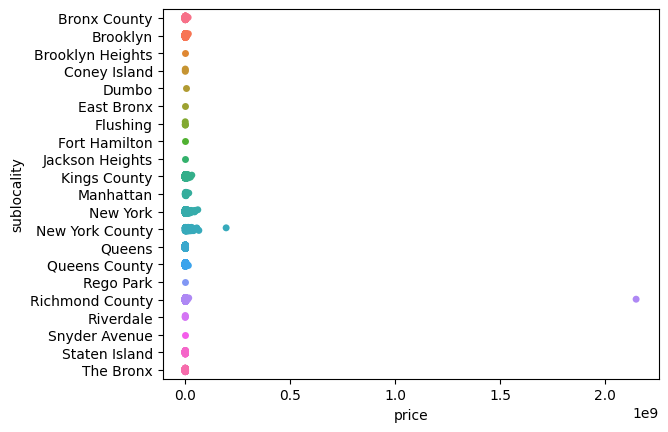

In [17]:
#Checking for outliers
sns.stripplot(data = housing,
             x= "price",
             y = "sublocality",
             hue = 'sublocality',
             legend = False)
plt.show()

Noticing a major outlier in Richmond County, we will investigate it.

In [18]:
housing[housing["price"] ==housing.loc[housing["sublocality"] == "Richmond County", "price"].max()]

brokertitle            type       price  beds  \
304  Brokered by ANNE LOPA REAL ESTATE  House for sale  2147483647     7   

     bath  propertysqft             address               state  \
304   6.0       10000.0  6659-6675 Amboy Rd  New York, NY 10309   

                             main_address administrative_area_level_2  \
304  6659-6675 Amboy RdNew York, NY 10309               United States   

     locality      sublocality    street_name   long_name  \
304  New York  Richmond County  Staten Island  Amboy Road   

                               formatted_address   latitude  longitude  
304  6659 Amboy Rd, Staten Island, NY 10309, USA  40.518484 -74.224418

This value skews the data too much, and seems to be an above average sale. We will remove this, along with any other extreme outliers now.

In [19]:
sublocality_counts = housing['sublocality'].value_counts()
multiples = sublocality_counts[sublocality_counts > 1].index.tolist()
sublocalities_multiple = housing[housing["sublocality"].isin(multiples)]
print(sublocalities_multiple.sublocality.value_counts())

sublocality
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
Jackson Heights        0
Fort Hamilton          0
East Bronx             0
Dumbo                  0
Rego Park              0
Brooklyn Heights       0
Snyder Avenue          0
Name: count, dtype: int64


In [20]:
sublocalities_multiple.loc[:,"sublocality"]=sublocalities_multiple.loc[:,"sublocality"].cat.remove_unused_categories()
sublocalities_multiple.sublocality.value_counts()

<ipython-input-20-9e0e6665069c>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Manhattan', 'New York County', 'Richmond County', 'New York County', 'New York County', ..., 'New York', 'Queens County', 'New York County', 'Queens', 'Brooklyn']
Length: 4794
Categories (14, object): ['Bronx County', 'Brooklyn', 'Coney Island', 'Flushing', ...,
                          'Richmond County', 'Riverdale', 'Staten Island', 'The Bronx']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  sublocalities_multiple.loc[:,"sublocality"]=sublocalities_multiple.loc[:,"sublocality"].cat.remove_unused_categories()


sublocality
New York           1016
Kings County        727
Queens County       684
Queens              555
Richmond County     480
Brooklyn            464
Bronx County        307
New York County     286
The Bronx           184
Staten Island        59
Manhattan            21
Flushing              4
Riverdale             4
Coney Island          3
Name: count, dtype: int64

<Figure size 1400x800 with 0 Axes>

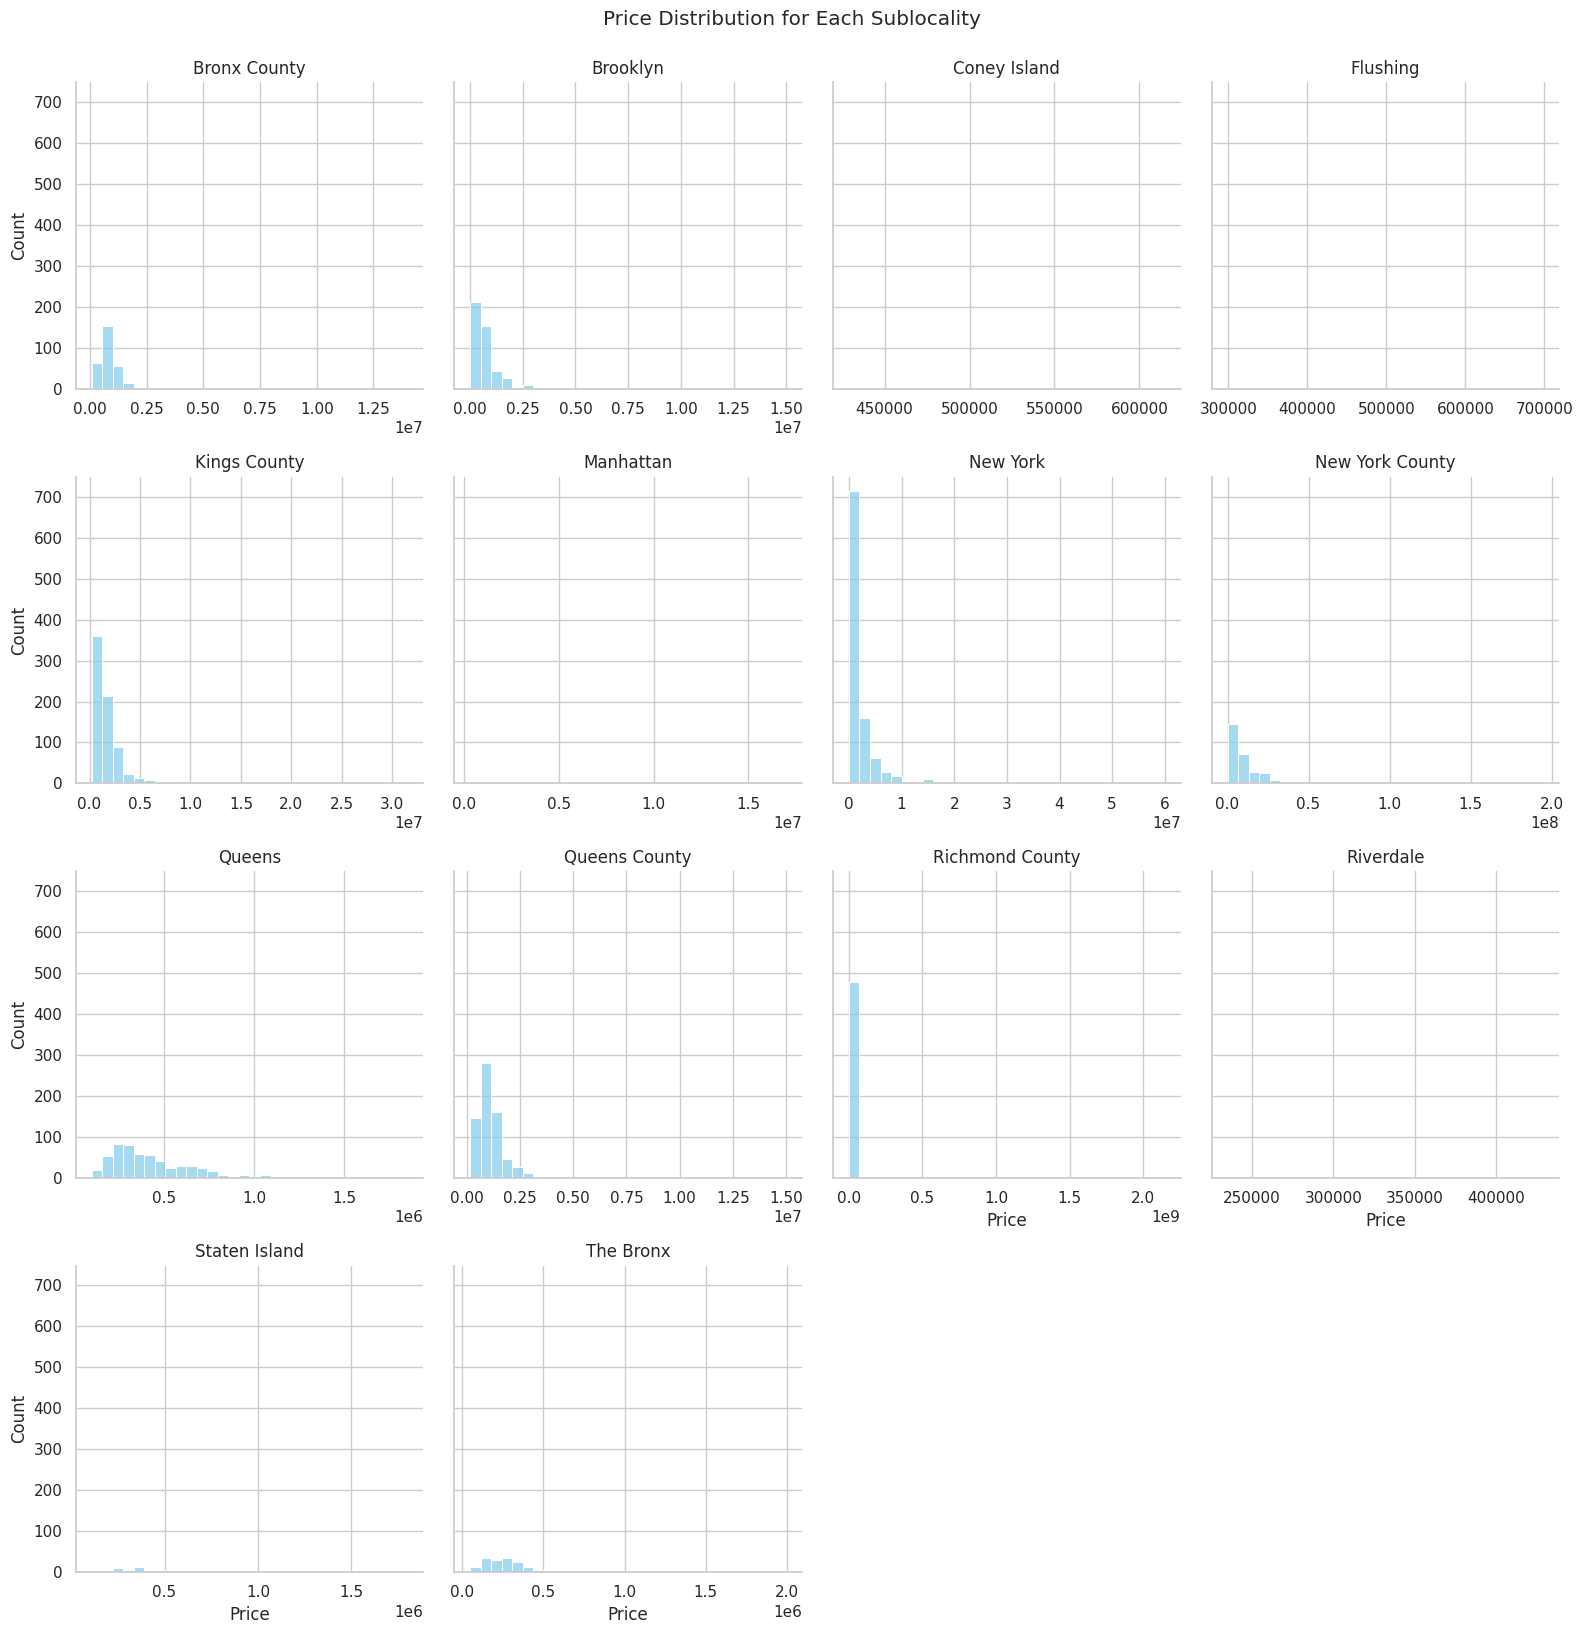

In [21]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Create a FacetGrid with subplots for each sublocality
g = sns.FacetGrid(sublocalities_multiple, col="sublocality", col_wrap=4, height=4, sharex=False)

g.map(sns.histplot, "price", kde=False, bins=30, color='skyblue')

g.set_axis_labels("Price", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Price Distribution for Each Sublocality", y=1.02)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dt

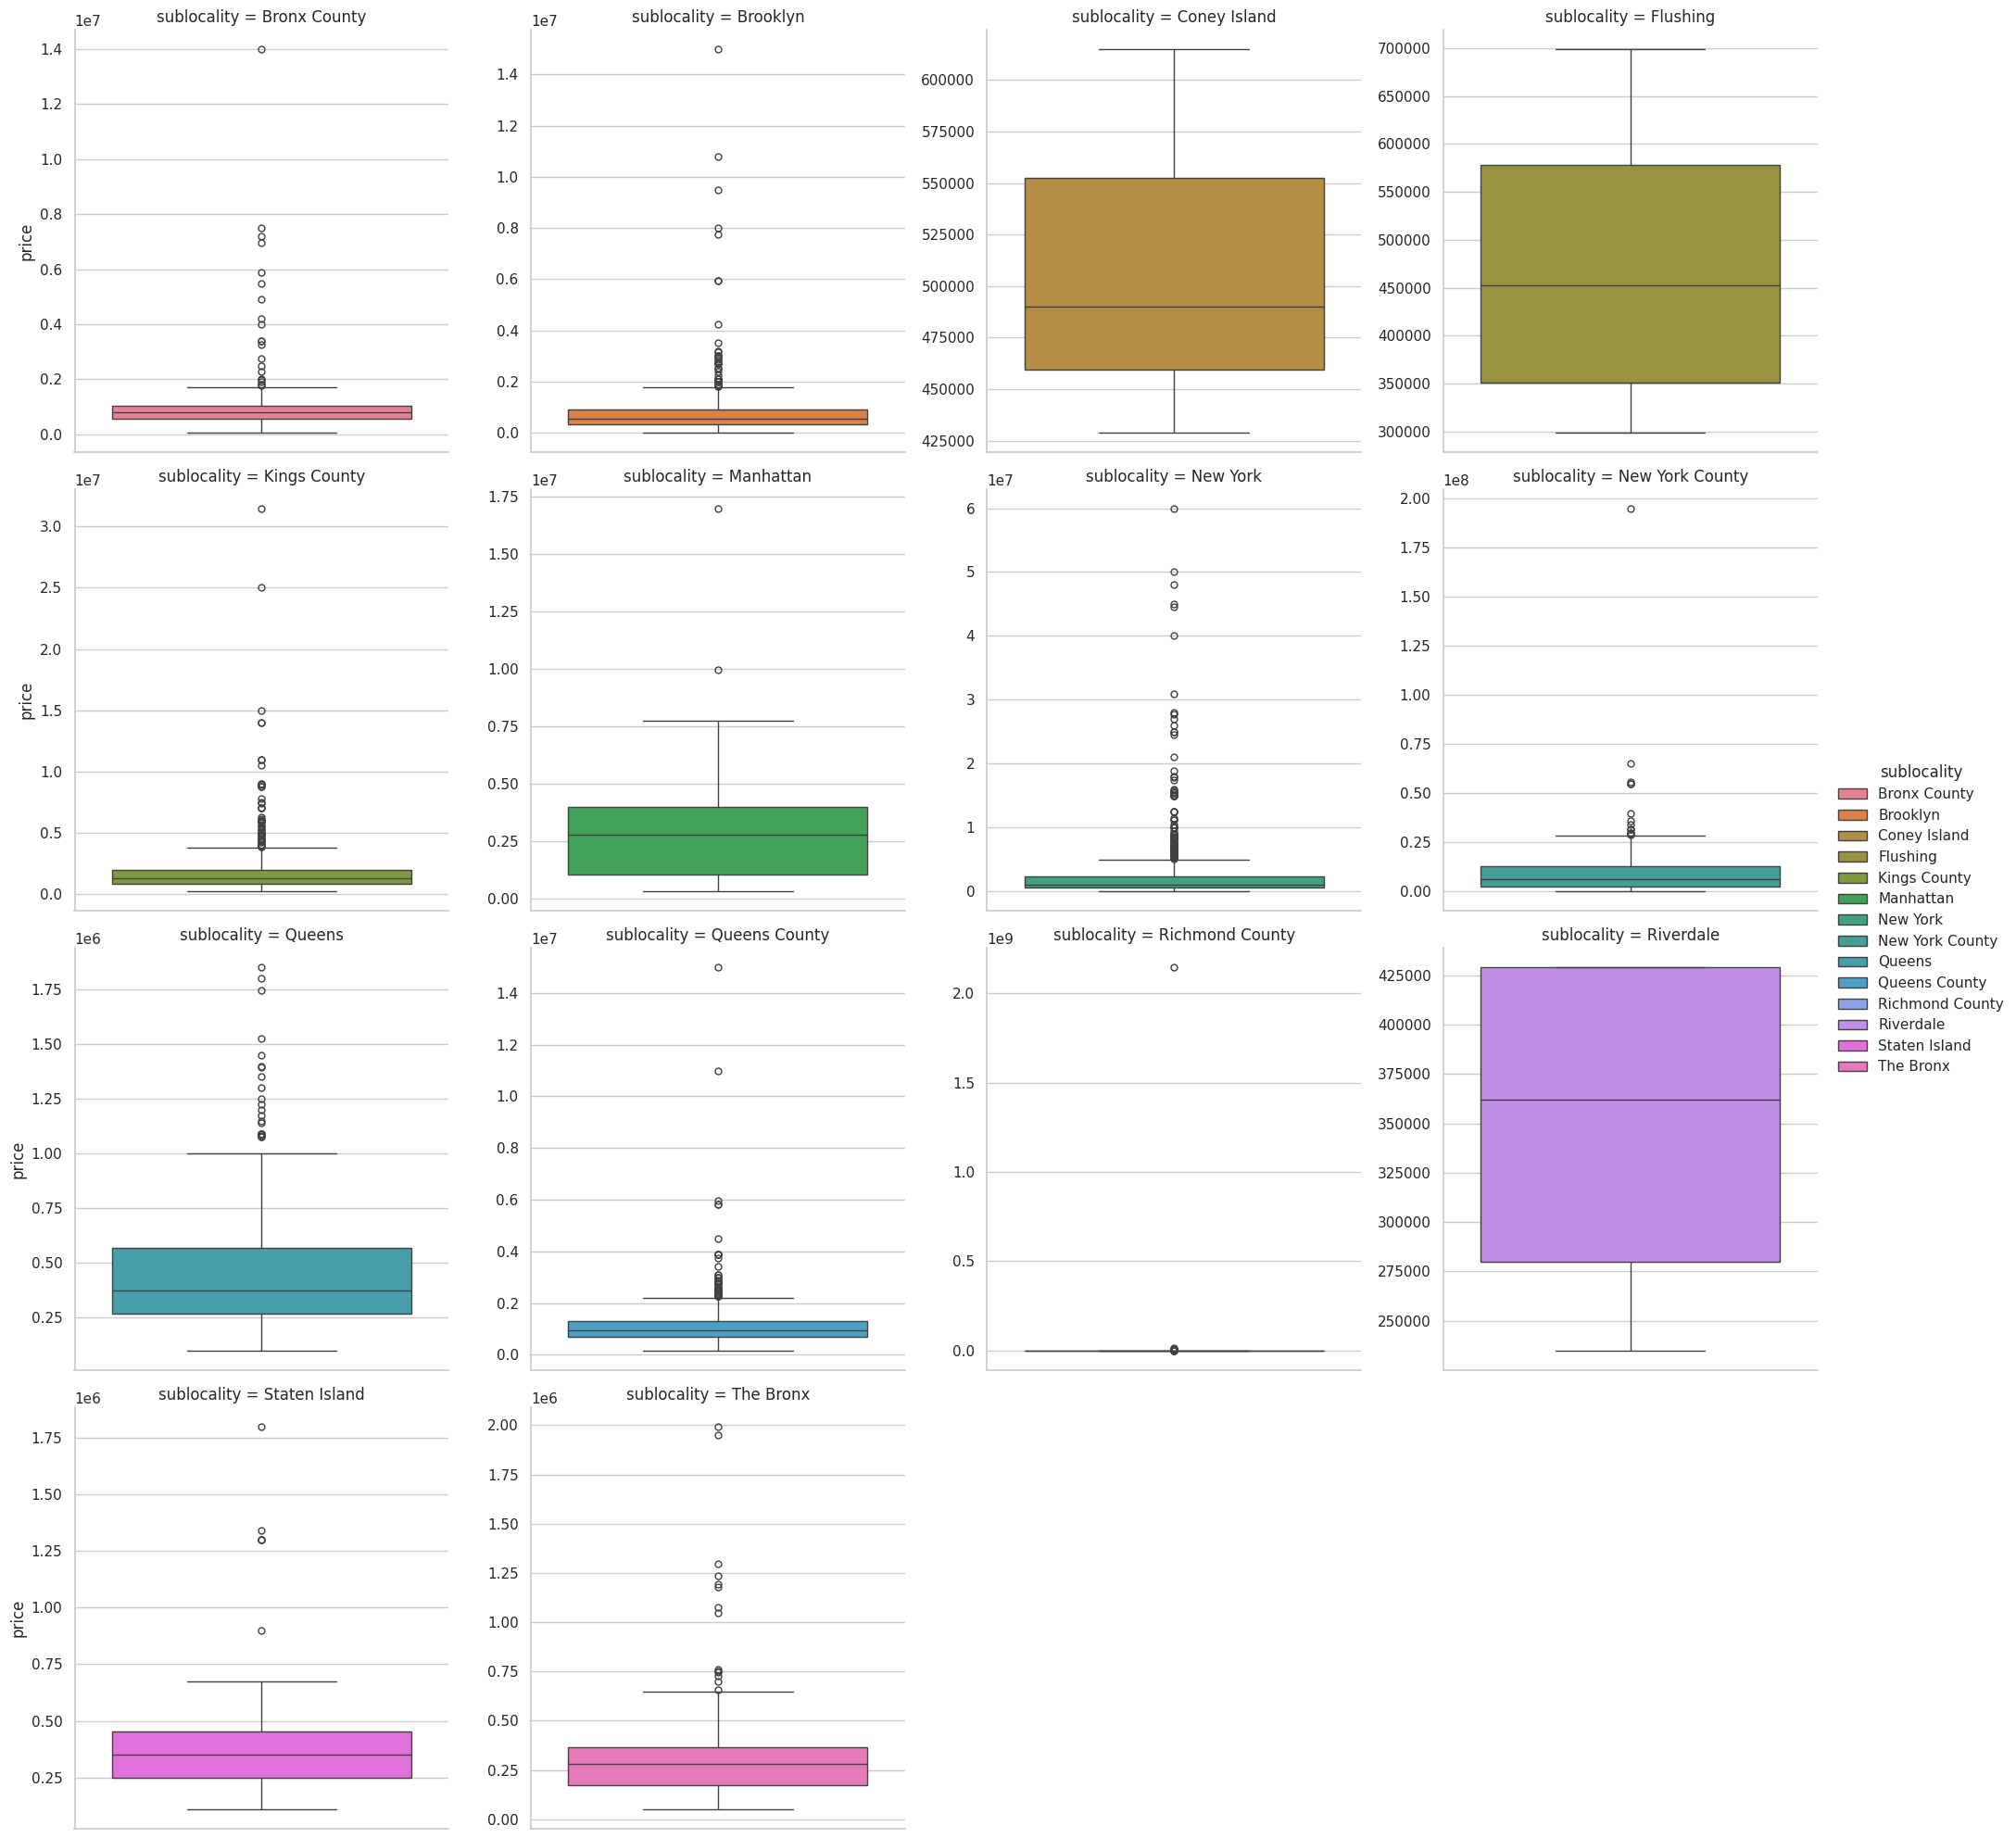

In [22]:
sns.catplot(data = sublocalities_multiple,
            y = "price",
            kind = "box",
            col = 'sublocality',
            hue = 'sublocality',
           col_wrap =4,
           sharey=False)

plt.show()

We will remove outliers, but only extreme outliers as to not affect the data too much.

In [23]:
def find_outliers(group):
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr

    return group[((group['price'] > upper_limit) | (group['price'] < lower_limit))]

outliers = housing.groupby('sublocality').apply(find_outliers)['address']
print(outliers)

housing_clean = housing[~housing["address"].isin(outliers)]
housing_clean

sublocality       
Bronx County  417                    2090 Arthur Ave
              513                 5041 Goodridge Ave
              823                    3650 Bronx Blvd
              1063                5020 Grosvenor Ave
              1068                6140 Delafield Ave
                                   ...              
The Bronx     3432     3777 Independence Ave Apt 16M
              3491               4 Marisa Ct Unit 4A
              3661       750 Kappock St Unit 611-614
              3899    4555 Henry Hudson Pkwy Apt 903
              4407          2500 Johnson Ave Apt 14H
Name: address, Length: 357, dtype: object


<ipython-input-23-041c28fdc6b4>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outliers = housing.groupby('sublocality').apply(find_outliers)['address']
<ipython-input-23-041c28fdc6b4>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = housing.groupby('sublocality').apply(find_outliers)['address']


brokertitle            type    price  \
0       Brokered by Douglas Elliman  -111 Fifth Ave  Condo for sale   315000   
2                            Brokered by Sowae Corp  House for sale   260000   
3                               Brokered by COMPASS  Condo for sale    69000   
5                            Brokered by Sowae Corp  House for sale   690000   
6     Brokered by Douglas Elliman - 575 Madison Ave  Condo for sale   899500   
...                                             ...             ...      ...   
4796                            Brokered by COMPASS  Co-op for sale   599000   
4797                Brokered by Mjr Real Estate Llc  Co-op for sale   245000   
4798  Brokered by Douglas Elliman - 575 Madison Ave  Co-op for sale  1275000   
4799        Brokered by E Realty International Corp  Condo for sale   598125   
4800             Brokered by Nyc Realty Brokers Llc  Co-op for sale   349000   

      beds  bath  propertysqft                    address  \
0        2   2.0   1400.000000       2 E 55th St Unit 803   
2        4   2.0   2015.000000           620 Sinclair Ave   
3        3   1.0    445.000000    2 E 55th St Unit 908W33   
5        5   2.0   4004.000000                584 Park Pl   
6        2   2.0   2184.207862     157 W 126th St Unit 1B   
...    ...   ...           ...                        ...   
4796     1   1.0   2184.207862       222 E 80th St Apt 3A   
4797     1   1.0   2184.207862        97-40 62 Dr Unit Lg   
4798     1   1.0   2184.207862  427 W 21st St Unit Garden   
4799     2   1.0    655.000000   91-23 Corona Ave Unit 4G   
4800     1   1.0    750.000000    460 Neptune Ave Apt 14O   

                        state                                 main_address  \
0          New York, NY 10022       2 E 55th St Unit 803New York, NY 10022   
2     Staten Island, NY 10312      620 Sinclair AveStaten Island, NY 10312   
3         Manhattan, NY 10022   2 E 55th St Unit 908W33Manhattan, NY 10022   
5          Brooklyn, NY 11238                584 Park PlBrooklyn, NY 11238   
6          New York, NY 10027     157 W 126th St Unit 1BNew York, NY 10027   
...                       ...                                          ...   
4796      Manhattan, NY 10075      222 E 80th St Apt 3AManhattan, NY 10075   
4797      Rego Park, NY 11374       97-40 62 Dr Unit LgRego Park, NY 11374   
4798       New York, NY 10011  427 W 21st St Unit GardenNew York, NY 10011   
4799       Elmhurst, NY 11373   91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800       Brooklyn, NY 11224    460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     administrative_area_level_2         locality      sublocality  \
0                New York County         New York        Manhattan   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
5                  United States         New York     Kings County   
6                       New York  New York County         New York   
...                          ...              ...              ...   
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York  New York County   
4799                    New York    Queens County           Queens   
4800                    New York     Kings County         Brooklyn   

           street_name         long_name  \
0     East 55th Street   Regis Residence   
2        Staten Island   Sinclair Avenue   
3             New York  East 55th Street   
5             Brooklyn        Park Place   
6            Manhattan               157   
...                ...               ...   
4796         Manhattan               222   
4797            Queens        62nd Drive   
4798          New York  West 21st Street   
4799          Flushing             91-23   
4800      Coney Island               460   

                                      f

Now that we've removed outliers, we will recheck the spread of the data.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

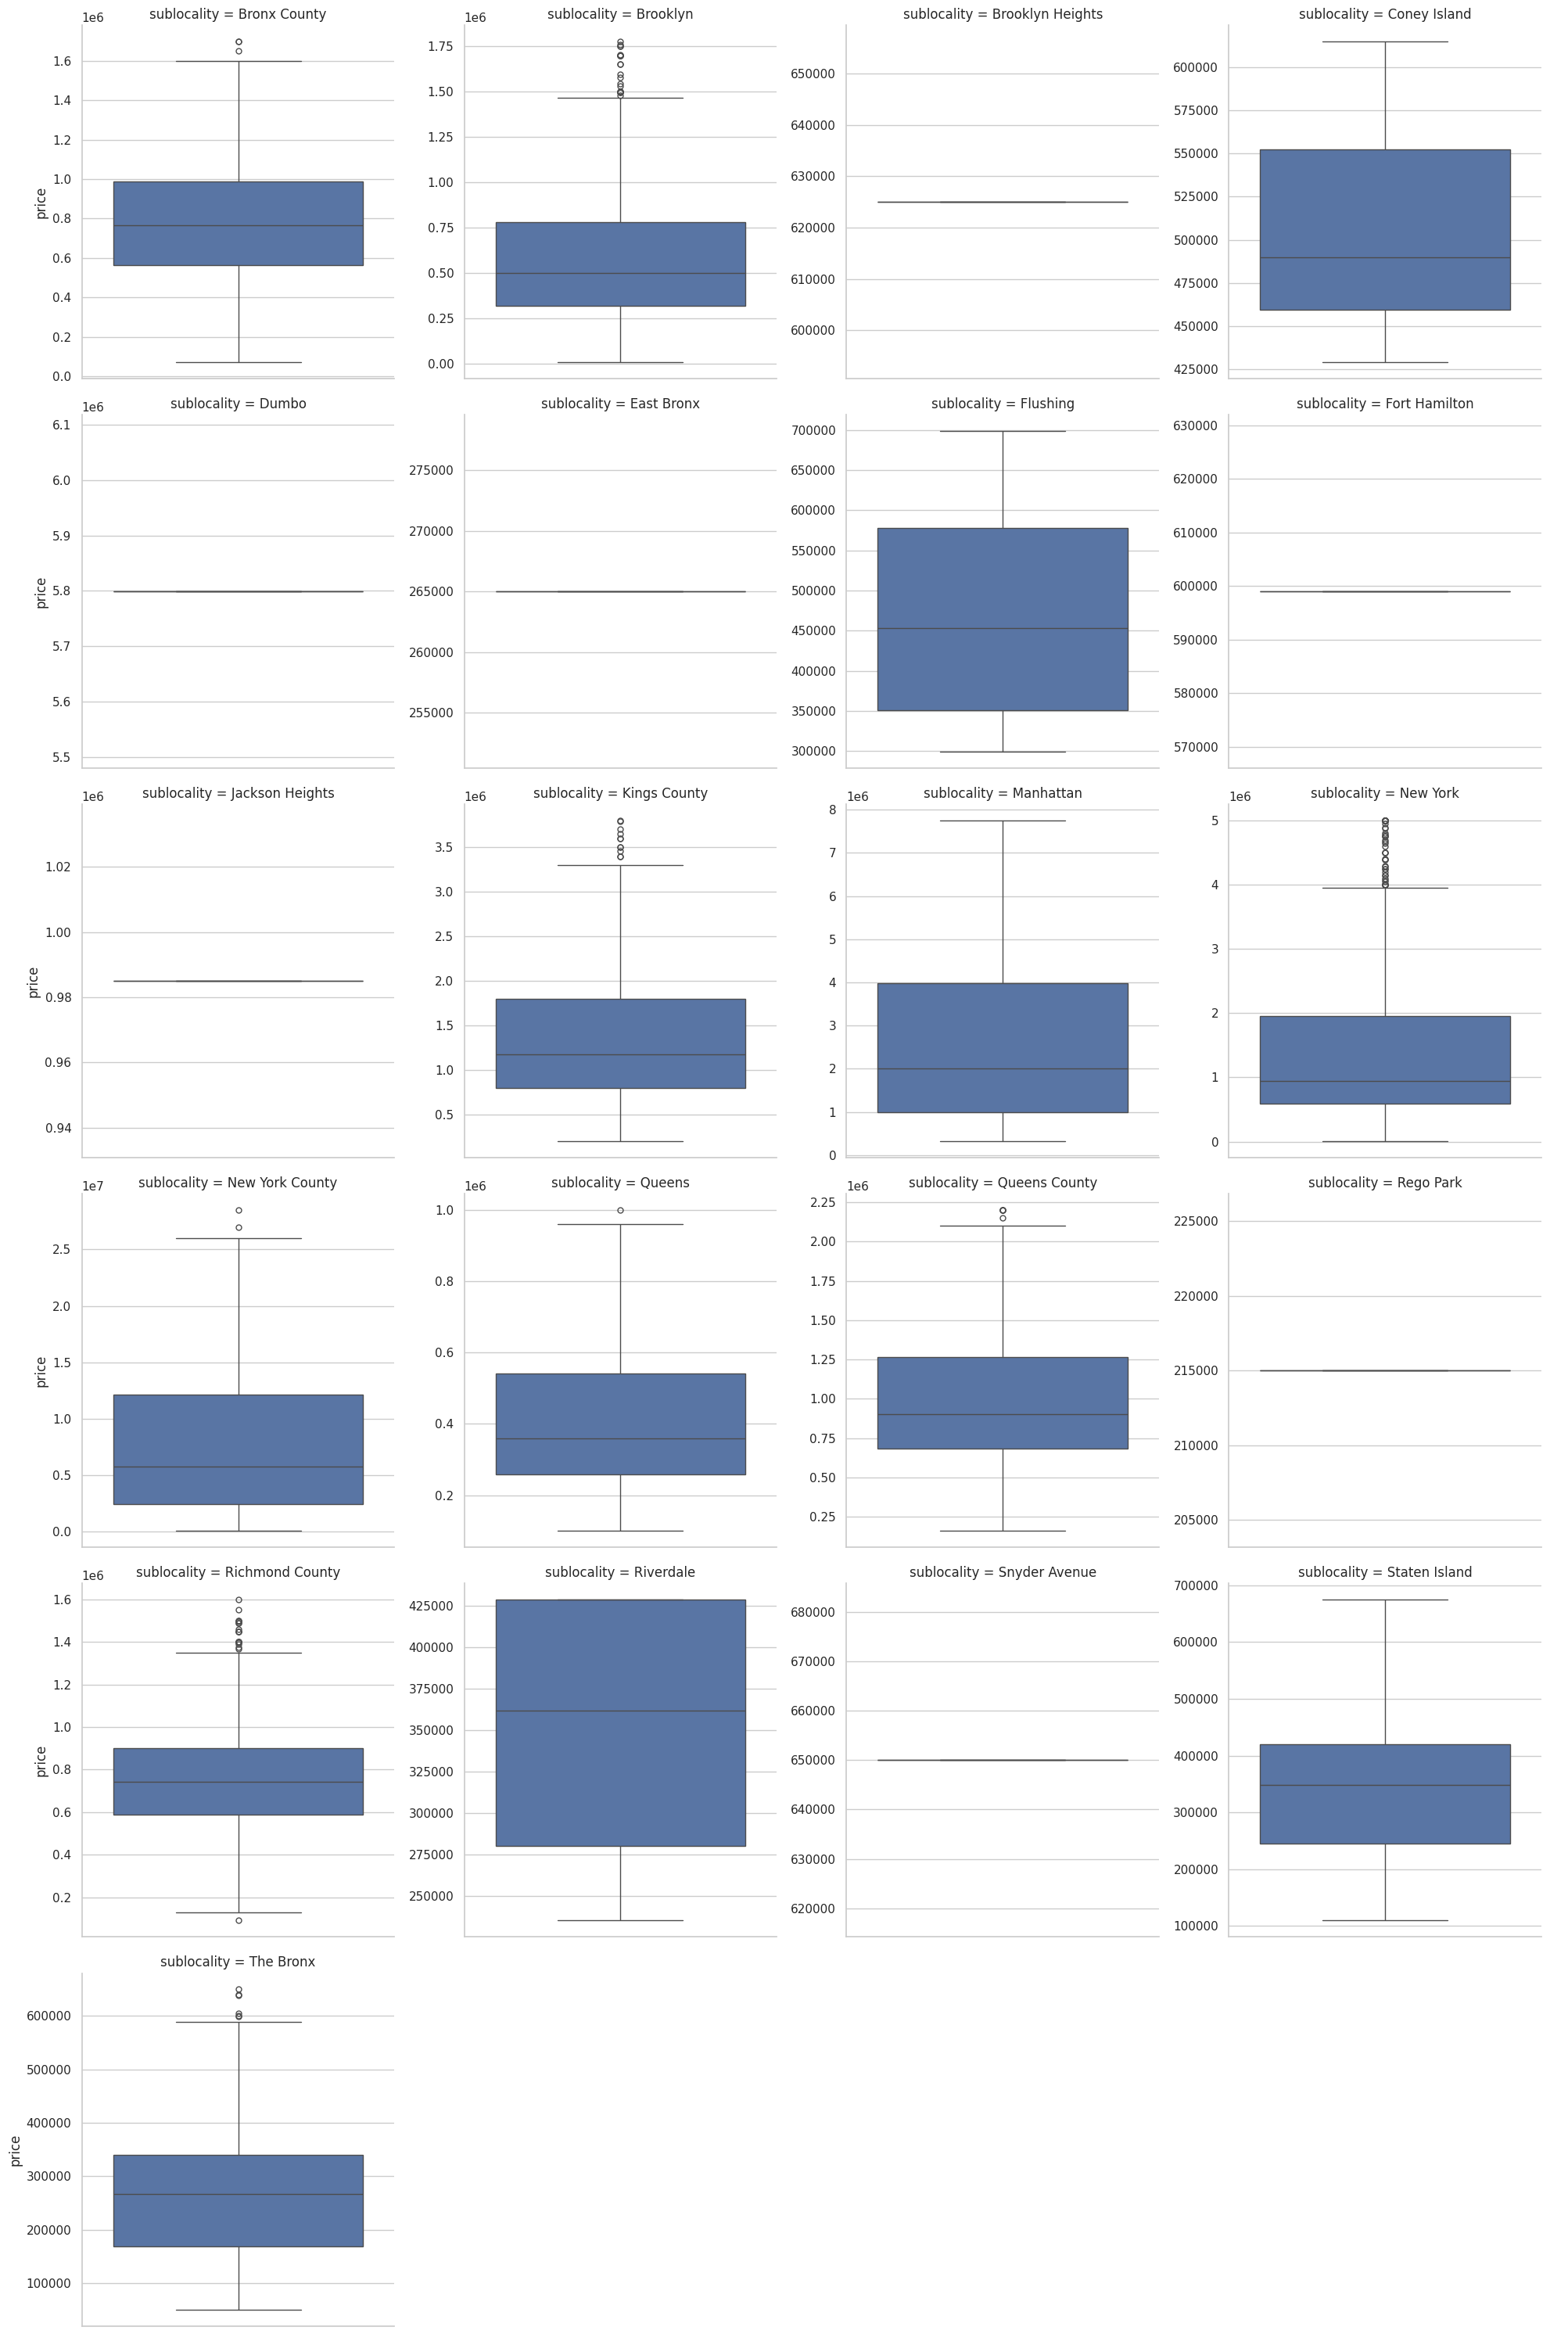

In [24]:
sns.catplot(data = housing_clean,
            y = "price",
            kind = "box",
            col = 'sublocality',
           col_wrap =4,
           sharey=False)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


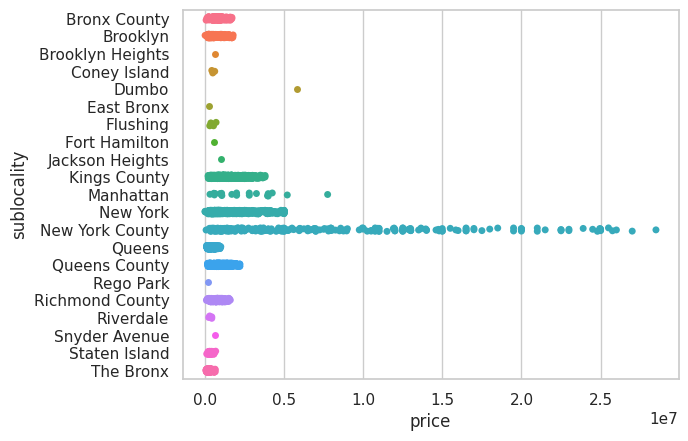

In [25]:
sns.stripplot(data = housing_clean,
             x= "price",
             y = "sublocality",
             hue = 'sublocality',
             legend = False)

plt.show()

<Figure size 1400x800 with 0 Axes>

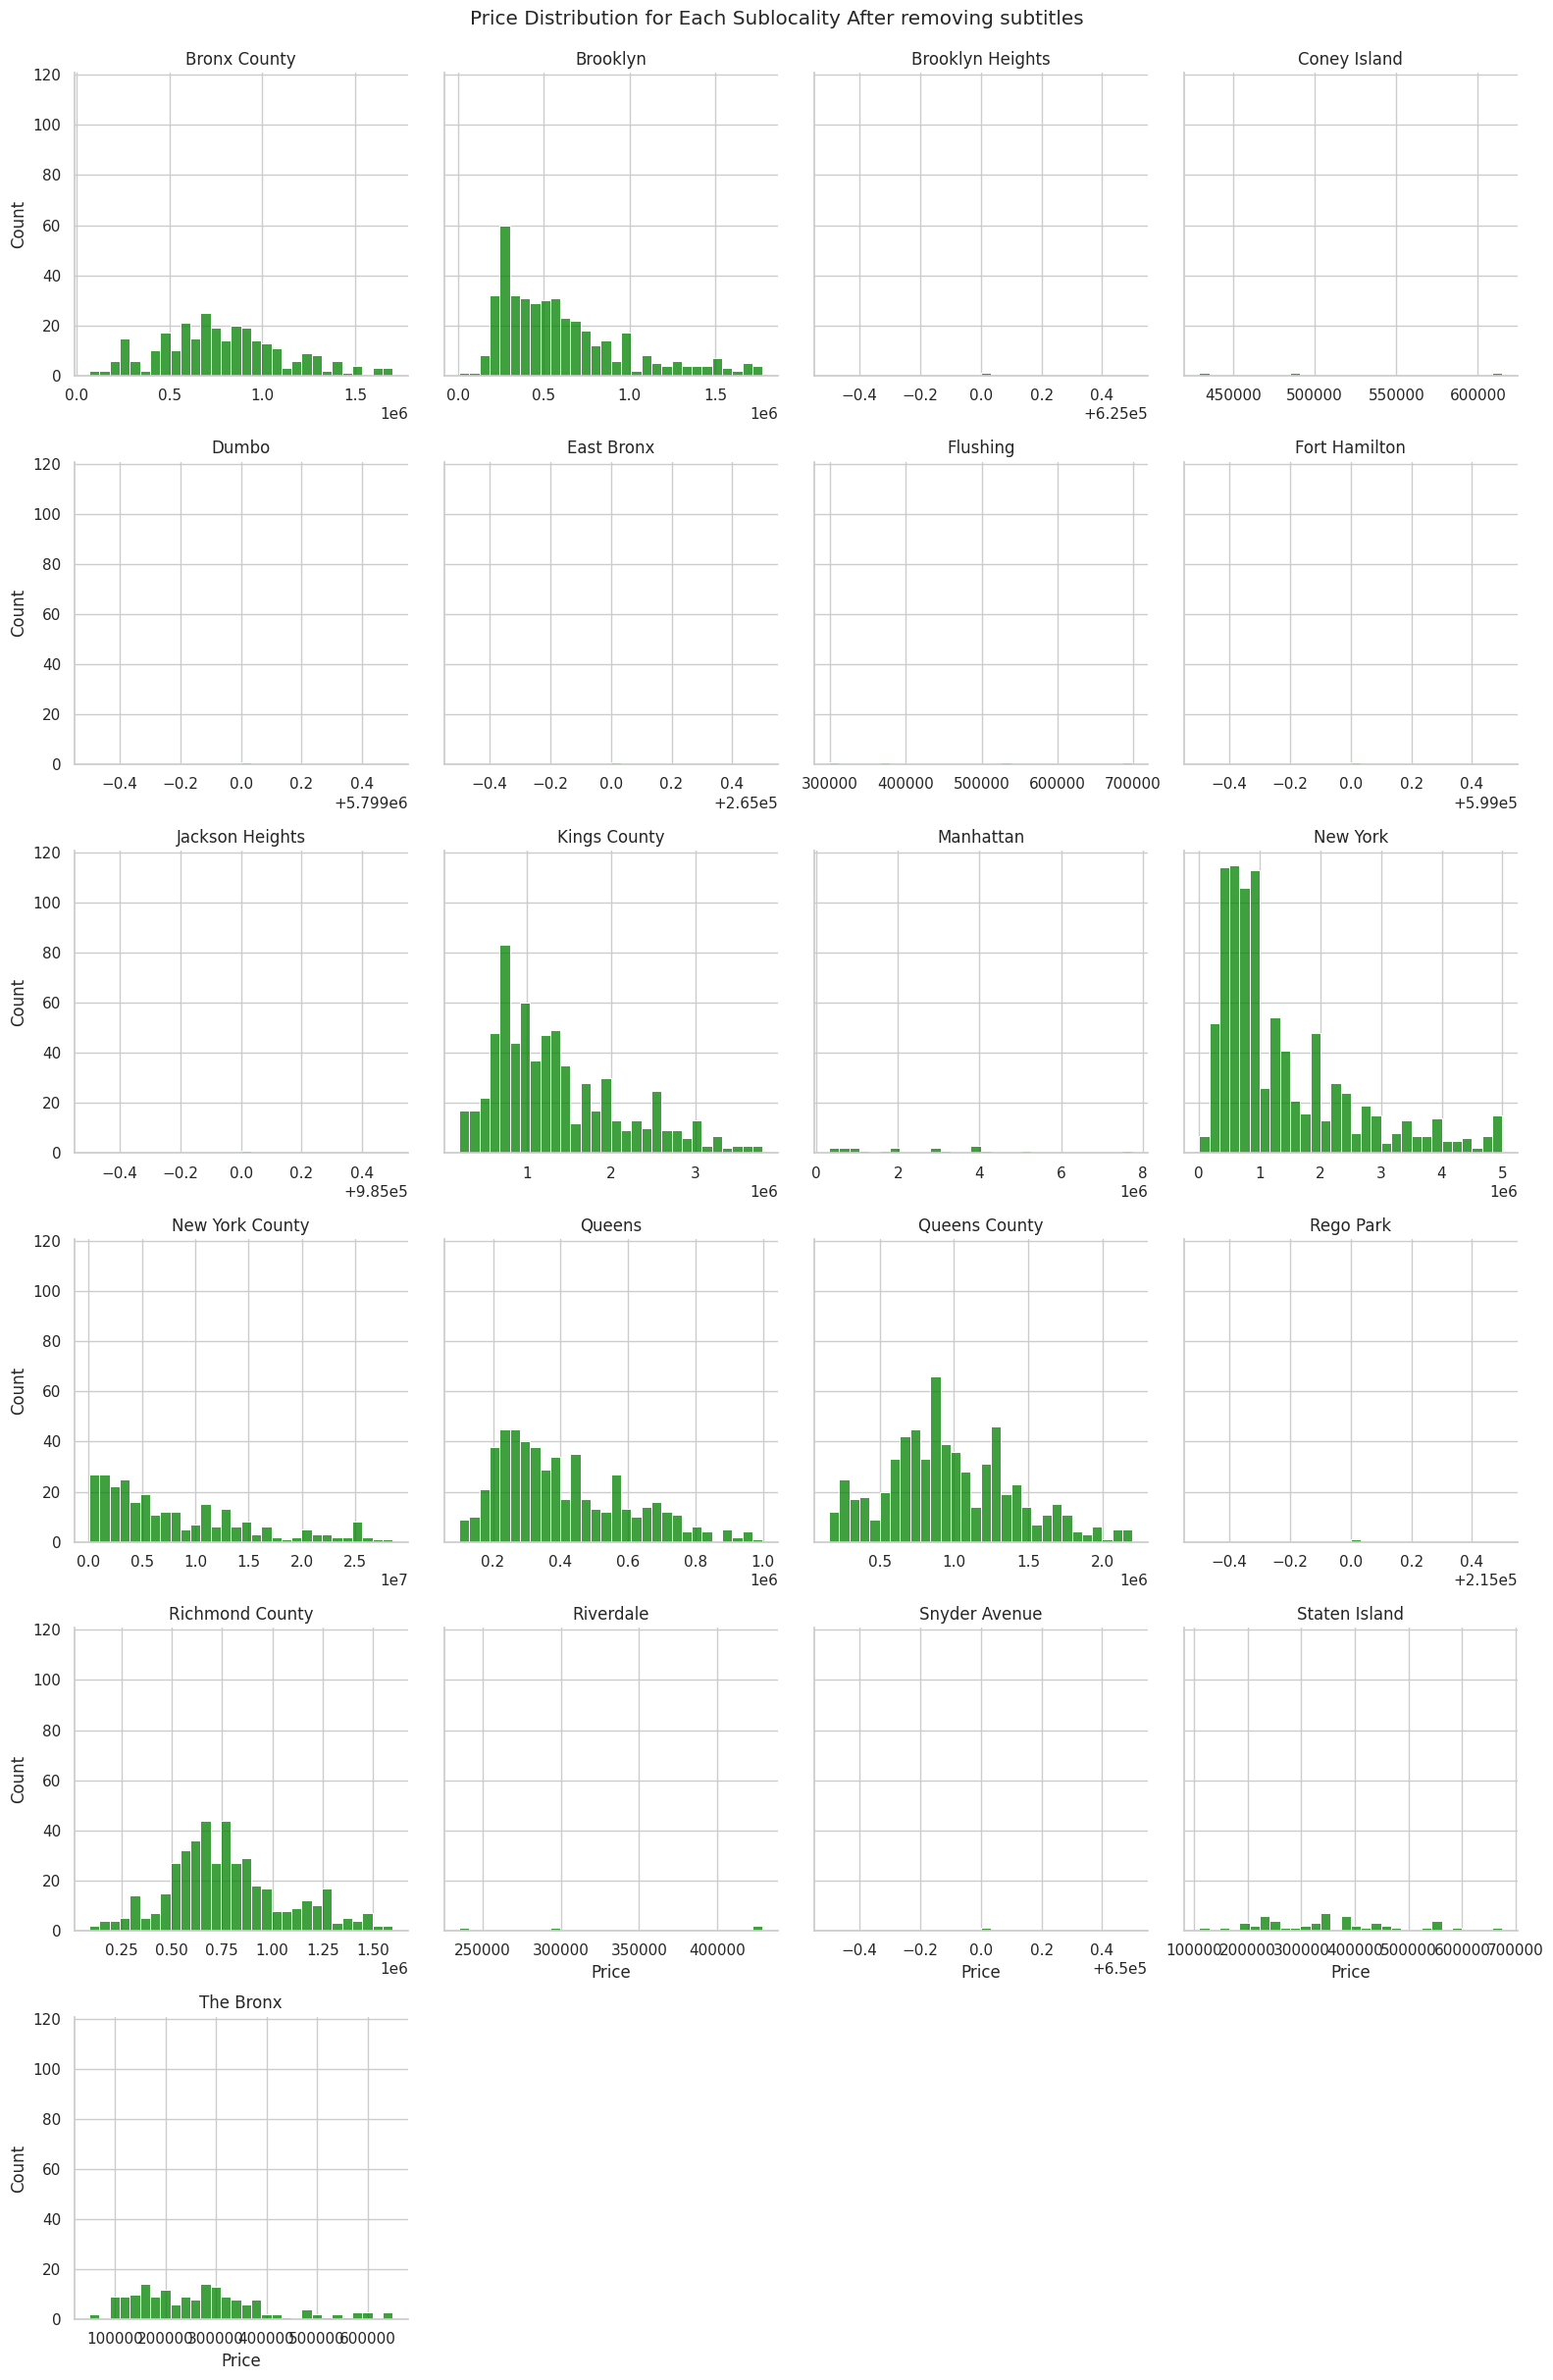

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Create a FacetGrid with subplots for each sublocality
g = sns.FacetGrid(housing_clean, col="sublocality", col_wrap=4, height=4, sharex=False)

g.map(sns.histplot, "price", kde=False, bins=30, color='green')

g.set_axis_labels("Price", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Price Distribution for Each Sublocality After removing subtitles", y = 1.01)

plt.show()

The variability in the prices by sublocality seem closer to normal now, we will proceed with these addresses.

## Checking out duplicated addresses

In [27]:
print(len(housing_clean))
print(housing_clean.address.nunique())

4444
4240


Above we recieve 4444 as the amount of rows in the cleaned dataframe, but 4240 unique addresses. Resulting in 204 duplicated addresses.

In [28]:
#Subsetting for duplicates based on address only
add_duplicates = housing_clean[housing_clean.address.duplicated()].address
add_duplicates
housing_dupl_add = housing_clean[housing_clean["address"].isin(add_duplicates)]
print(len(housing_dupl_add))

406


In [29]:
#Take the length of the unique addresses within the duplicates
len(housing_dupl_add.address.unique())


202

We recieve 406 addresses in the duplicated dataframe, with 202 unique values. So that should be mean that 200 are duplicated once (400 total rows, 2 per address), and two are duplicated twice (6 total rows, 3 per address). We will take the value counts of the addresses to confirm.

In [30]:
housing_dupl_add.address.value_counts()

address
2619 Shore Pkwy                        3
856 Washington Ave Apt 6C              3
200 E 94th St Apt 414                  2
5614 Netherland Ave Apt 4B             2
61-20 Grand Central Pkwy Unit B1210    2
                                      ..
79-28 68th Ave                         2
425 W 24th St Apt 1E                   2
66-36 Yellowstone Blvd Unit 23C        2
58 Roanoke St                          2
242 E 15th St Apt 1                    2
Name: count, Length: 202, dtype: int64

While we want to remove duplicated rows, we need to make sure that the duplicated addresses are full duplicates.

In [31]:
full_duplicates=housing_clean[housing_clean.duplicated(keep=False)]
full_duplicates

brokertitle  \
80        Brokered by Douglas Elliman - 575 Madison Ave   
81        Brokered by Douglas Elliman - 575 Madison Ave   
113                              Brokered by Sowae Corp   
114                              Brokered by Sowae Corp   
115                              Brokered by Sowae Corp   
...                                                 ...   
4760                                           NoBroker   
4770  Brokered by Sotheby's International Realty - E...   
4775                    Brokered by EXIT REALTY PREMIER   
4780                                           NoBroker   
4782  Brokered by Sotheby's International Realty - E...   

                            type    price  beds      bath  propertysqft  \
80                Condo for sale  1650000     2  2.000000   1065.000000   
81                Condo for sale  1650000     2  2.000000   1065.000000   
113               House for sale   400000     4  2.000000   1980.000000   
114   Multi-family home for sale   346000     5  2.000000   2184.207862   
115               House for sale   400000     4  2.000000   1980.000000   
...                          ...      ...   ...       ...           ...   
4760  Multi-family home for sale  2000000     8  2.373861   2184.207862   
4770              Condo for sale  2600000     3  2.000000   1729.000000   
4775              House for sale   749000     3  2.373861   2002.000000   
4780  Multi-family home for sale  2000000     8  2.373861   2184.207862   
4782              Condo for sale  2600000     3  2.000000   1729.000000   

                    address                 state  \
80    200 E 94th St Apt 414    New York, NY 10128   
81    200 E 94th St Apt 414    New York, NY 10128   
113         781 Sheperd Ave    Brooklyn, NY 11208   
114         103-12 104th St  Ozone Park, NY 11417   
115         781 Sheperd Ave    Brooklyn, NY 11208   
...                     ...                   ...   
4760           2324 60th St    Brooklyn, NY 11204   
4770    242 E 15th St Apt 1    New York, NY 10003   
4775           631 Essex St    Brooklyn, NY 11208   
4780           2324 60th St    Brooklyn, NY 11204   
4782    242 E 15th St Apt 1    New York, NY 10003   

                                 main_address administrative_area_level_2  \
80    200 E 94th St Apt 414New York, NY 10128                    New York   
81    200 E 94th St Apt 414New York, NY 10128                    New York   
113         781 Sheperd AveBrooklyn, NY 11208               United States   
114       103-12 104th StOzone Park, NY 11417               United States   
115         781 Sheperd AveBrooklyn, NY 11208               United States   
...                                       ...                         ...   
4760           2324 60th StBrooklyn, NY 11204               United States   
4770    242 E 15th St Apt 1New York, NY 10003                    New York   
4775           631 Essex StBrooklyn, NY 11208               United States   
4780           2324 60th StBrooklyn, NY 11204               United States   
4782    242 E 15th St Apt 1New York, NY 10003                    New York   

             locality    sublocality street_name        long_name  \
80    New York County       New York   Manhattan              200   
81    New York County       New York   Manhattan              200   
113          New York   Kings County    Brooklyn  Shepherd Avenue   
114          New York  Queens County      Queens     104th Street   
115          New York   Kings County    Brooklyn  Shepherd Avenue   
...               ...            ...         ...              ...   
4760         New York   Kings County    Brooklyn      60th Street   
4770  New York County       New York   Manhattan              242   
4775         New York   Kings County    Brooklyn     Essex Street   
4780         New York   Kings County    Brooklyn      60th Street   
4782  New York County       New York   Manhattan              242   

                                   formatte

Taking the addresses of both, and finding the difference

In [32]:
address_list = set(housing_dupl_add.address.unique().tolist())
full_list = set(full_duplicates.address.unique().tolist())

not_full_dupl = address_list.symmetric_difference(full_list)

not_full_dupl_df = housing_clean[housing_clean["address"].isin(not_full_dupl)]
not_full_dupl_df

brokertitle  \
3914                    Brokered by Ny Superior Realty   
3989                    Brokered by Ny Superior Realty   
4204  Brokered by Nest Seekers International, Westside   
4759                            Brokered by R New York   

                            type    price  beds      bath  propertysqft  \
3914  Multi-family home for sale  1548000     9  4.000000   4539.000000   
3989              House for sale  1548000     9  4.000000   2184.207862   
4204              House for sale  3200000     6  5.000000   5000.000000   
4759  Multi-family home for sale  2500000     3  2.373861   4100.000000   

              address               state                     main_address  \
3914  104-14 37th Ave    Corona, NY 11368  104-14 37th AveCorona, NY 11368   
3989  104-14 37th Ave    Corona, NY 11368  104-14 37th AveCorona, NY 11368   
4204    18 W 127th St  New York, NY 10027  18 W 127th StNew York, NY 10027   
4759    18 W 127th St  New York, NY 10027  18 W 127th StNew York, NY 10027   

     administrative_area_level_2  locality      sublocality street_name  \
3914               United States  New York    Queens County      Queens   
3989               United States  New York    Queens County      Queens   
4204               United States  New York  New York County    New York   
4759               United States  New York  New York County    New York   

              long_name                         formatted_address   latitude  \
3914        37th Avenue  104-14 37th Ave, Flushing, NY 11368, USA  40.753419   
3989        37th Avenue  104-14 37th Ave, Flushing, NY 11368, USA  40.753419   
4204  West 127th Street    18 W 127th St, New York, NY 10027, USA  40.807940   
4759  West 127th Street    18 W 127th St, New York, NY 10027, USA  40.807940   

      longitude  
3914 -73.862881  
3989 -73.862881  
4204 -73.942354  
4759 -73.942354

We have two addresses that have duplicated addressed, but mismatched information. It seems as though the second entry for each property is an error as the values are unusual. We will keep the first entry for each.

In [33]:
print(len(housing_clean)) #Should be 4444
clean_df = housing_clean.drop_duplicates(subset = ["address"], keep = "first") #Since we are keeping the first instance, we will get the correct non-fully duplicated rows
print(len(clean_df)) #should be  4240 (losing 200 rows from 1x duplicates, and 4 rows from 2x duplicates (204 deleted))
print(clean_df.address.value_counts()[clean_df.address.value_counts()>1]) #making sure there are no more duplicated rows

4444
4240
Series([], Name: count, dtype: int64)


In [34]:
#Now check that the correct non-full duplicates were kept
not_full_list = not_full_dupl_df.address.unique().tolist()
clean_df[clean_df.address.isin(not_full_list)]
#it kept the correct rows. We now have our cleaned dataframe

brokertitle  \
3914                    Brokered by Ny Superior Realty   
4204  Brokered by Nest Seekers International, Westside   

                            type    price  beds  bath  propertysqft  \
3914  Multi-family home for sale  1548000     9   4.0        4539.0   
4204              House for sale  3200000     6   5.0        5000.0   

              address               state                     main_address  \
3914  104-14 37th Ave    Corona, NY 11368  104-14 37th AveCorona, NY 11368   
4204    18 W 127th St  New York, NY 10027  18 W 127th StNew York, NY 10027   

     administrative_area_level_2  locality      sublocality street_name  \
3914               United States  New York    Queens County      Queens   
4204               United States  New York  New York County    New York   

              long_name                         formatted_address   latitude  \
3914        37th Avenue  104-14 37th Ave, Flushing, NY 11368, USA  40.753419   
4204  West 127th Street    18 W 127th St, New York, NY 10027, USA  40.807940   

      longitude  
3914 -73.862881  
4204 -73.942354

## Exploring Data for Analysis

In [35]:
clean_df.columns

Index(['brokertitle', 'type', 'price', 'beds', 'bath', 'propertysqft',
       'address', 'state', 'main_address', 'administrative_area_level_2',
       'locality', 'sublocality', 'street_name', 'long_name',
       'formatted_address', 'latitude', 'longitude'],
      dtype='object')

In [36]:
selected_features = ['brokertitle','address','type', 'beds', 'bath', 'propertysqft', 'sublocality', 'price', 'latitude','longitude']
df = clean_df[selected_features]

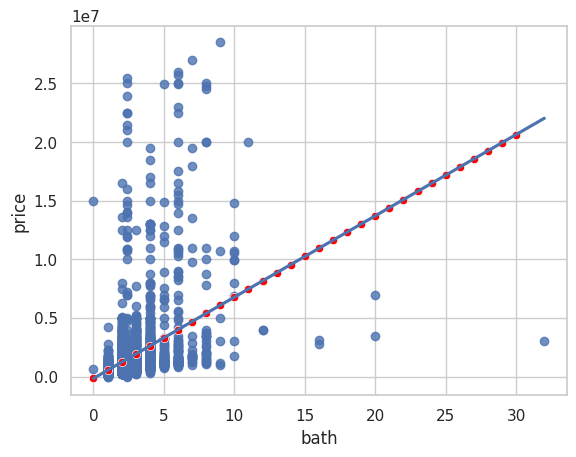

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     960.5
Date:                Fri, 26 Apr 2024   Prob (F-statistic):          2.89e-190
Time:                        17:39:15   Log-Likelihood:                -68045.
No. Observations:                4240   AIC:                         1.361e+05
Df Residuals:                    4238   BIC:                         1.361e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.58e+05   6.05e+04     -2.610      0.009   -2.77e+05   -3.93e+04
bath        6.935e+05   2.24e+04     30.992      0.000     6.5e+05    7.37e+05
==============================================================================
Omnibus:                     4662.647   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           390404.987
Skew:                           5.616   Prob(JB):                         0.00
Kurtosis:                      48.648   Cond. No.                         5.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
bath_v_price = ols("price~bath", data = df).fit()
baths = pd.DataFrame({'bath': np.arange(0, 31)})
bath_pred = bath_v_price.predict(baths)

pred_data = baths.assign(price= bath_pred)

fig = plt.figure()
sns.regplot(data = df,
           x="bath",
           y="price",
           ci=None)
sns.scatterplot(data = pred_data,
           x="bath",
           y="price",
           color = 'red')

plt.show()

bath_v_price.summary()

In [38]:
#parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
#searcher = GridSearchCV(model, parameters)

#print("Best CV params", searcher.best_params_)
#print("Best CV accuracy", searcher.best_score_)


In [39]:
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='price',
                     hover_name='address', #size='mag',
                     title='Real Estate Prices in NYC')
fig.update_geos(fitbounds="locations")
fig.show()

# Modelling the Data

In [40]:
model_features = ['brokertitle','type', 'beds', 'bath', 'propertysqft', 'sublocality', 'price']
df_model = df[model_features]
df_model

brokertitle            type  beds  \
0       Brokered by Douglas Elliman  -111 Fifth Ave  Condo for sale     2   
2                            Brokered by Sowae Corp  House for sale     4   
3                               Brokered by COMPASS  Condo for sale     3   
5                            Brokered by Sowae Corp  House for sale     5   
6     Brokered by Douglas Elliman - 575 Madison Ave  Condo for sale     2   
...                                             ...             ...   ...   
4796                            Brokered by COMPASS  Co-op for sale     1   
4797                Brokered by Mjr Real Estate Llc  Co-op for sale     1   
4798  Brokered by Douglas Elliman - 575 Madison Ave  Co-op for sale     1   
4799        Brokered by E Realty International Corp  Condo for sale     2   
4800             Brokered by Nyc Realty Brokers Llc  Co-op for sale     1   

      bath  propertysqft      sublocality    price  
0      2.0   1400.000000        Manhattan   315000  
2      2.0   2015.000000  Richmond County   260000  
3      1.0    445.000000  New York County    69000  
5      2.0   4004.000000     Kings County   690000  
6      2.0   2184.207862         New York   899500  
...    ...           ...              ...      ...  
4796   1.0   2184.207862         New York   599000  
4797   1.0   2184.207862    Queens County   245000  
4798   1.0   2184.207862  New York County  1275000  
4799   1.0    655.000000           Queens   598125  
4800   1.0    750.000000         Brooklyn   349000  

[4240 rows x 7 columns]

In [41]:
#Checking the data types
df_model.dtypes

brokertitle       object
type              object
beds               int64
bath             float64
propertysqft     float64
sublocality     category
price              int64
dtype: object

In [42]:
#Fixing data types
df_model.loc[:,['brokertitle', 'type','sublocality']] = df_model.loc[:,['brokertitle', 'type','sublocality']].astype("category")
df_model.dtypes



brokertitle       object
type              object
beds               int64
bath             float64
propertysqft     float64
sublocality     category
price              int64
dtype: object

In [43]:
X= df[["beds","bath","propertysqft","sublocality"]]
print(X)


      beds  bath  propertysqft      sublocality
0        2   2.0   1400.000000        Manhattan
2        4   2.0   2015.000000  Richmond County
3        3   1.0    445.000000  New York County
5        5   2.0   4004.000000     Kings County
6        2   2.0   2184.207862         New York
...    ...   ...           ...              ...
4796     1   1.0   2184.207862         New York
4797     1   1.0   2184.207862    Queens County
4798     1   1.0   2184.207862  New York County
4799     2   1.0    655.000000           Queens
4800     1   1.0    750.000000         Brooklyn

[4240 rows x 4 columns]


In [44]:
y = df["price"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [46]:
n_estimators = np.arange(5,21,1)

estimator_r2 = {}
for est in n_estimators:
    xg_cl = xgb.XGBRegressor(objective = "reg:squarederror",
                             n_estimators=est,
                             seed = 123,
                             enable_categorical=True)
    xg_cl.fit(X_train,y_train)
    pred_price = xg_cl.predict(X_test)
    mse = mean_squared_error(y_test, pred_price)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, pred_price)
    estimator_r2[est] = [mse, rmse, r_squared]

estimator_df = pd.DataFrame.from_dict(estimator_r2, orient='index', columns=["MSE", "RMSE", "R-squared"])
estimator_df




MSE          RMSE  R-squared
5   2.482520e+12  1.575601e+06   0.624633
6   2.308723e+12  1.519448e+06   0.650912
7   2.267028e+12  1.505665e+06   0.657216
8   2.214678e+12  1.488179e+06   0.665132
9   2.183816e+12  1.477774e+06   0.669798
10  2.191712e+12  1.480443e+06   0.668604
11  2.156272e+12  1.468425e+06   0.673963
12  2.162329e+12  1.470486e+06   0.673047
13  2.142951e+12  1.463882e+06   0.675977
14  2.151354e+12  1.466750e+06   0.674707
15  2.169652e+12  1.472974e+06   0.671940
16  2.175639e+12  1.475005e+06   0.671035
17  2.187298e+12  1.478952e+06   0.669272
18  2.207222e+12  1.485672e+06   0.666259
19  2.199499e+12  1.483071e+06   0.667427
20  2.193486e+12  1.481042e+06   0.668336

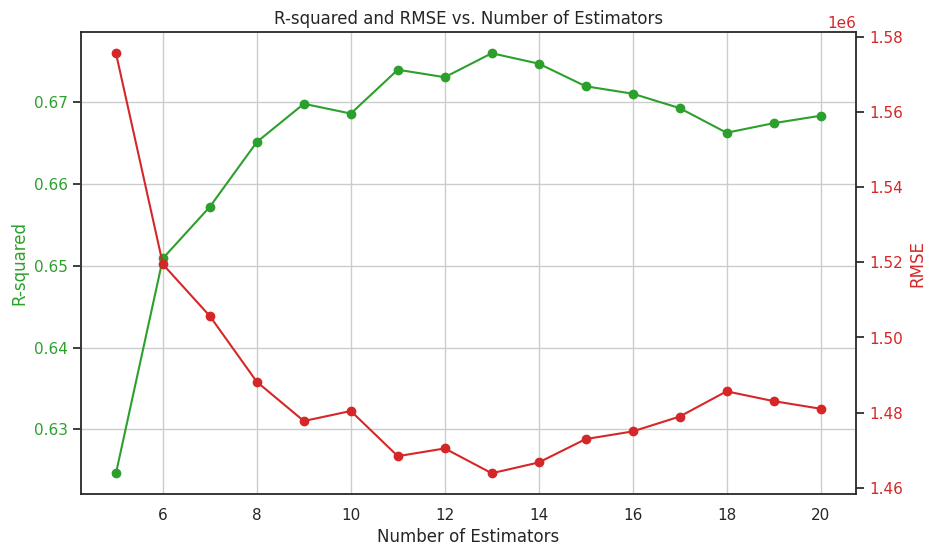

In [47]:
fix, ax1 = plt.subplots(figsize = (10,6))
sns.set(style='white')

ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('R-squared', color="tab:green")
ax1.plot(estimator_df.index, estimator_df['R-squared'], color='tab:green')
ax1.scatter(estimator_df.index, estimator_df['R-squared'], color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Secondary y-axis for RMSE
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='tab:red')
ax2.plot(estimator_df.index, estimator_df['RMSE'], color='tab:red')
ax2.scatter(estimator_df.index, estimator_df['RMSE'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('R-squared and RMSE vs. Number of Estimators')
plt.show()

The best fit for this model seems to be with n_estimators = 13.

*Note: it might be better to have included n_estimators in the cross validation, however we continue to use this method to stay consistent with the original author of the notebook*

In [48]:
params_grid = {'max_depth':[3,5,8],
              "learning_rate":[0.3,0.4, 0.5],
              'lambda': [10, 50, 100],
              'alpha':[10, 50, 100]}

xg_grid = xgb.XGBRegressor(objective = "reg:squarederror",
                           booster = 'dart',
                           n_estimators = 13,
                           seed = 123,
                           enable_categorical=True)

grid_search = GridSearchCV(xg_grid,
                           params_grid,
                           cv = 3,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

# We will use this in the second half
xg_original_best_params = grid_search.best_params_

xg_model = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters:  {'alpha': 100, 'lambda': 10, 'learning_rate': 0.4, 'max_depth': 5}
Best Negative Mean Squared Error:  -1949935930118.0032


### Original XGBoost

In [49]:
pred_price = xg_model.predict(X_test)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 2032648855814.29 
 RMSE = 1425709.95
 r-squared = 0.693


After spending a lot of time running the Grid Search with different hyperparameter options, this model seems to have the best fit onto the data. R^2 = 0.693 was the highest value receieved. DART was used over gbtree in order to prevent overfitting.

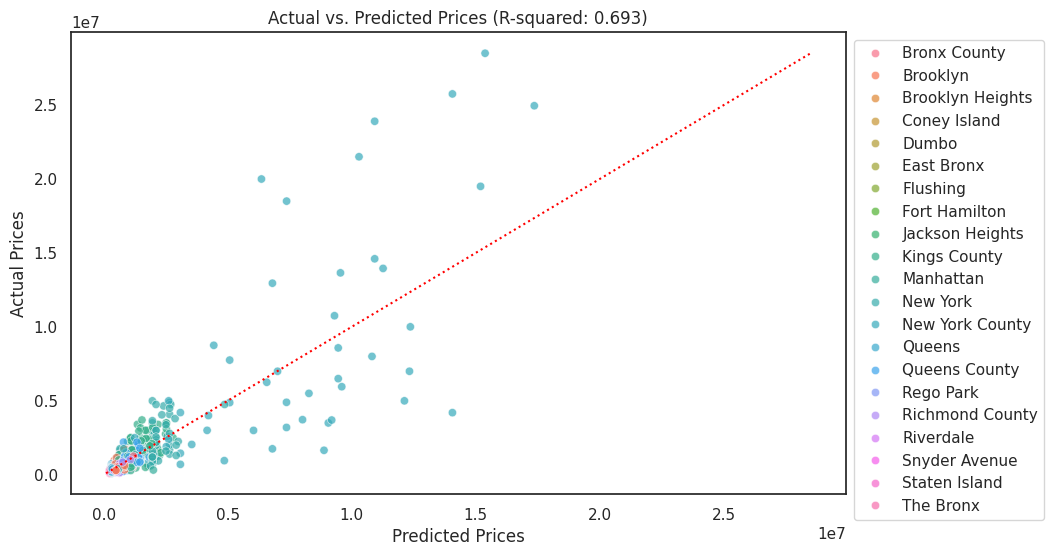

In [50]:
plot_data = pd.DataFrame({"pred_price":pred_price,"y_test":y_test,"sublocality":X_test['sublocality']})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = plot_data, x="pred_price", y="y_test",hue = "sublocality", alpha=0.7)
plt.title(f'Actual vs. Predicted Prices (R-squared: {r_squared:.3f})')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle=":")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

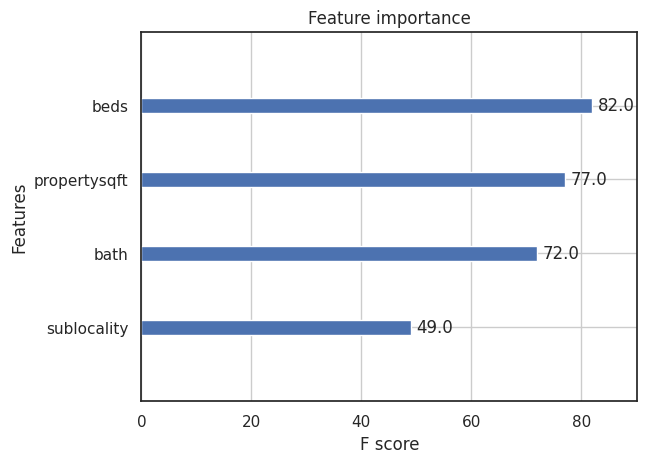

In [51]:
xgb.plot_importance(xg_model)
plt.show()

In [52]:
# xgb.plot_tree(xg_model, num_trees = 12, rankdir="LR")
# plt.show()

## Experimenting with other models
Using the above, let's find other models that might fit well. Scott only uses the xgboost regressor. Let's see if we can't tune a model that has better metrics

In [53]:
# First, store results
# mse = mean_squared_error(y_test, pred_price)
# rmse = np.sqrt(mse)
# r_squared = r2_score(y_test, pred_price)
model_performances = pd.DataFrame({'model':['original xgboost'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})
model_performances

model           mse          rmse  r_squared
0  original xgboost  2.032649e+12  1.425710e+06   0.692655

One way we can compare is to use the baseline models. Here we try:
- CatBoostRegressor
- RandomForestRegressor
- XGBoost with different hyperparameters

In [54]:
%pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.1 MB/s eta 0:00:00


In [55]:
from catboost import CatBoostRegressor

tree_counts = np.arange(5, 26, 1)

estimator_r2_catboost = {}
for tree_count in tree_counts:
    catboost_cl = CatBoostRegressor(iterations=tree_count,  # Equivalent to number of trees
                                     random_seed=123,
                                     verbose=0,
                                     cat_features = ['sublocality'])
    catboost_cl.fit(X_train, y_train)
    pred_price = catboost_cl.predict(X_test)
    mse = mean_squared_error(y_test, pred_price)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, pred_price)
    estimator_r2_catboost[tree_count] = [mse, rmse, r_squared]

estimator_df_catboost = pd.DataFrame.from_dict(estimator_r2_catboost, orient='index',
                                               columns=["MSE", "RMSE", "R-squared"])
estimator_df_catboost


MSE          RMSE  R-squared
5   2.459079e+12  1.568145e+06   0.628177
6   2.415786e+12  1.554280e+06   0.634723
7   2.412392e+12  1.553188e+06   0.635237
8   2.429033e+12  1.558535e+06   0.632720
9   2.430309e+12  1.558945e+06   0.632528
10  2.425897e+12  1.557529e+06   0.633195
11  2.374179e+12  1.540837e+06   0.641015
12  2.373050e+12  1.540471e+06   0.641185
13  2.354505e+12  1.534440e+06   0.643989
14  2.290405e+12  1.513408e+06   0.653682
15  2.302524e+12  1.517407e+06   0.651849
16  2.237391e+12  1.495791e+06   0.661697
17  2.218510e+12  1.489466e+06   0.664552
18  2.226501e+12  1.492146e+06   0.663344
19  2.275013e+12  1.508315e+06   0.656009
20  2.247914e+12  1.499305e+06   0.660106
21  2.237717e+12  1.495900e+06   0.661648
22  2.220268e+12  1.490056e+06   0.664287
23  2.199711e+12  1.483142e+06   0.667395
24  2.211445e+12  1.487093e+06   0.665621
25  2.256382e+12  1.502126e+06   0.658826

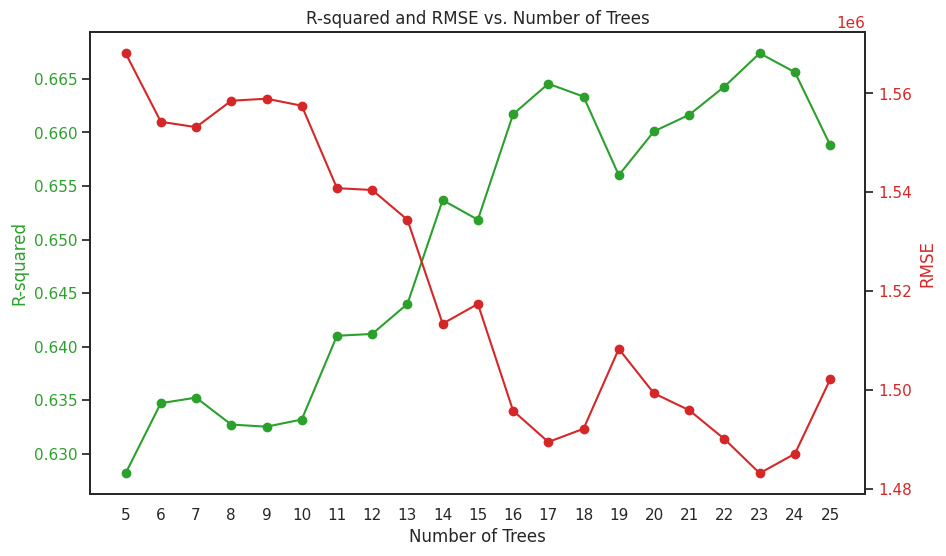

In [56]:
fix, ax1 = plt.subplots(figsize = (10,6))
sns.set(style='white')

ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('R-squared', color="tab:green")
ax1.plot(estimator_df_catboost.index, estimator_df_catboost['R-squared'], color='tab:green')
ax1.scatter(estimator_df_catboost.index, estimator_df_catboost['R-squared'], color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Secondary y-axis for RMSE
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='tab:red')
ax2.plot(estimator_df_catboost.index, estimator_df_catboost['RMSE'], color='tab:red')
ax2.scatter(estimator_df_catboost.index, estimator_df_catboost['RMSE'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.xticks(ticks=[i for i in range(5,26,1)])

plt.title('R-squared and RMSE vs. Number of Trees')
plt.show()

The best parameters appear to be 17 number of trees. It could possibly be 23, but this seems more safe.

In [57]:
# Here, we tried to make the parameter search equivalent to XGBoost since CatBoost's parameter choices are comparable

params_grid = {'depth':[3,5,8],
              "learning_rate":[0.3,0.4, 0.5],
              'boosting_type': ['Ordered', 'Plain'],
              'l2_leaf_reg': [10, 50, 100]}

cat_grid = CatBoostRegressor(iterations=13,  # Equivalent to number of trees
                           random_seed=123,
                           cat_features = ['sublocality'],
                           objective='RMSE',
                           verbose=0)

grid_search = GridSearchCV(cat_grid,
                           params_grid,
                           cv = 2,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

cat_model = grid_search.best_estimator_

Fitting 2 folds for each of 54 candidates, totalling 108 fits
Best Parameters:  {'boosting_type': 'Plain', 'depth': 5, 'l2_leaf_reg': 10, 'learning_rate': 0.5}
Best Negative Mean Squared Error:  -2353940549605.051


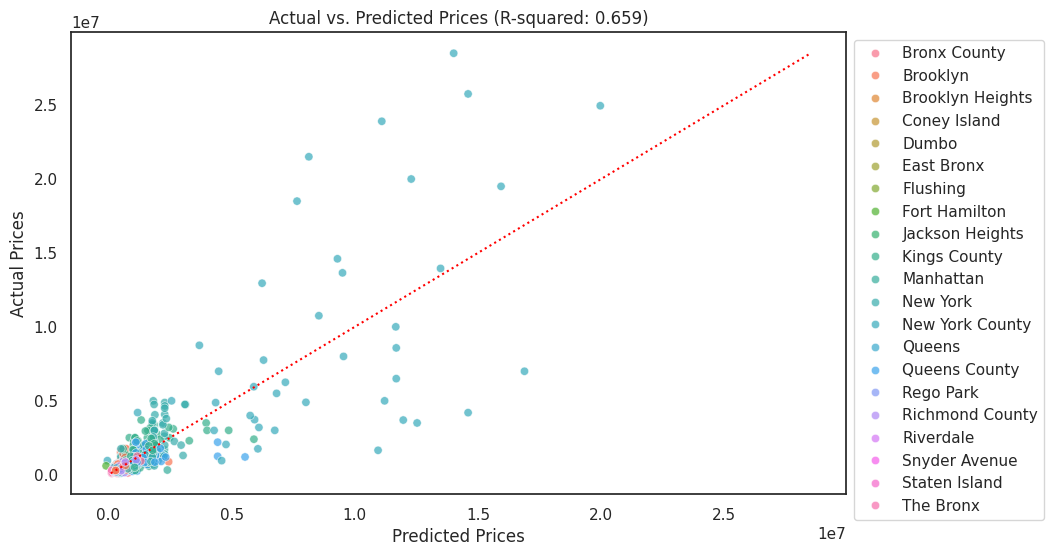

In [58]:
plot_data = pd.DataFrame({"pred_price":pred_price,"y_test":y_test,"sublocality":X_test['sublocality']})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = plot_data, x="pred_price", y="y_test",hue = "sublocality", alpha=0.7)
plt.title(f'Actual vs. Predicted Prices (R-squared: {r_squared:.3f})')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle=":")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [59]:
# Evaluation
pred_price = cat_model.predict(X_test)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 2429561142890.38 
 RMSE = 1558704.96
 r-squared = 0.633


### CatBoost

In [60]:
model_performances = pd.concat([model_performances,
           pd.DataFrame({'model':['catboost'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})])
model_performances

model           mse          rmse  r_squared
0  original xgboost  2.032649e+12  1.425710e+06   0.692655
0          catboost  2.429561e+12  1.558705e+06   0.632641

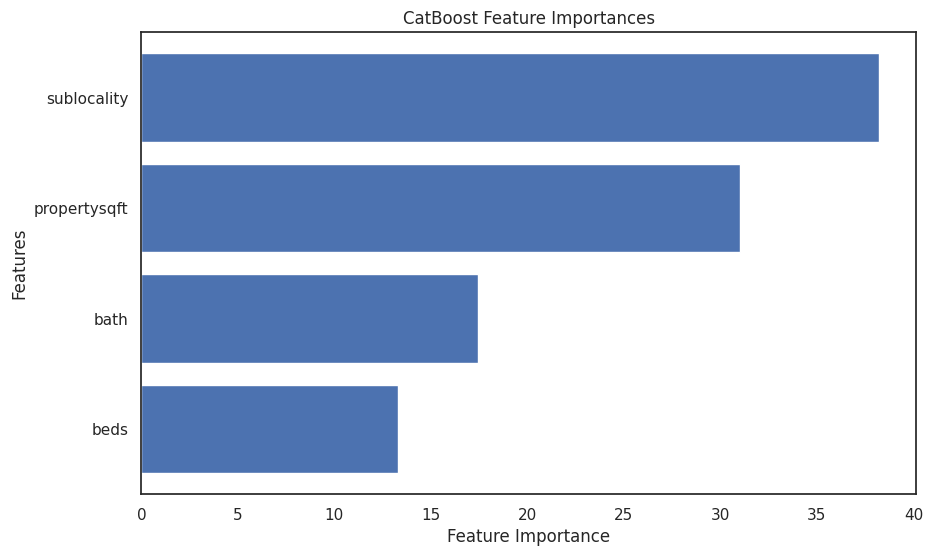

In [61]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importance = cat_model.get_feature_importance(type='FeatureImportance')
feature_names = X_train.columns
sorted_idx = feature_importance.argsort()

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importances')
plt.show()

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3392 entries, 3553 to 386
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   beds          3392 non-null   int64   
 1   bath          3392 non-null   float64 
 2   propertysqft  3392 non-null   float64 
 3   sublocality   3392 non-null   category
dtypes: category(1), float64(2), int64(1)
memory usage: 110.0 KB


Note: we have to onehot encode the variables for randomforest since sklearn only takes numeric inputs. We must take this into account as this may make give unfairness in the results compared to xgboost and catboost.

In [63]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['sublocality']

# Apply one-hot encoding to categorical features
ohe = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

# Drop the original categorical features from the dataset
X_train_numeric = X_train.drop(columns=categorical_features)
X_test_numeric = X_test.drop(columns=categorical_features)

# Concatenate the encoded features with the numerical features
X_train_processed = np.concatenate([X_train_numeric, X_train_encoded], axis=1)
X_test_processed = np.concatenate([X_test_numeric, X_test_encoded], axis=1)


In [64]:
from sklearn.ensemble import RandomForestRegressor

tree_counts = np.arange(10, 201, 10)

estimator_r2_rf = {}
for tree_count in tree_counts:
    rf_cl = RandomForestRegressor(n_estimators=tree_count,  # Equivalent to number of trees
                                     random_state=123)
    rf_cl.fit(X_train_processed, y_train)
    pred_price = rf_cl.predict(X_test_processed)
    mse = mean_squared_error(y_test, pred_price)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, pred_price)
    estimator_r2_rf[tree_count] = [mse, rmse, r_squared]

estimator_df_rf = pd.DataFrame.from_dict(estimator_r2_rf, orient='index',
                                               columns=["MSE", "RMSE", "R-squared"])
estimator_df_rf

MSE          RMSE  R-squared
10   1.980197e+12  1.407195e+06   0.700586
20   1.763931e+12  1.328131e+06   0.733286
30   1.843994e+12  1.357937e+06   0.721181
40   1.884064e+12  1.372612e+06   0.715122
50   1.886630e+12  1.373547e+06   0.714734
60   1.851494e+12  1.360696e+06   0.720047
70   1.854058e+12  1.361638e+06   0.719659
80   1.855866e+12  1.362302e+06   0.719386
90   1.823959e+12  1.350540e+06   0.724210
100  1.819429e+12  1.348862e+06   0.724895
110  1.829211e+12  1.352483e+06   0.723416
120  1.829027e+12  1.352415e+06   0.723444
130  1.828738e+12  1.352308e+06   0.723487
140  1.833803e+12  1.354180e+06   0.722722
150  1.848713e+12  1.359674e+06   0.720467
160  1.857608e+12  1.362941e+06   0.719122
170  1.859985e+12  1.363813e+06   0.718763
180  1.872579e+12  1.368422e+06   0.716859
190  1.887134e+12  1.373730e+06   0.714658
200  1.870737e+12  1.367749e+06   0.717137

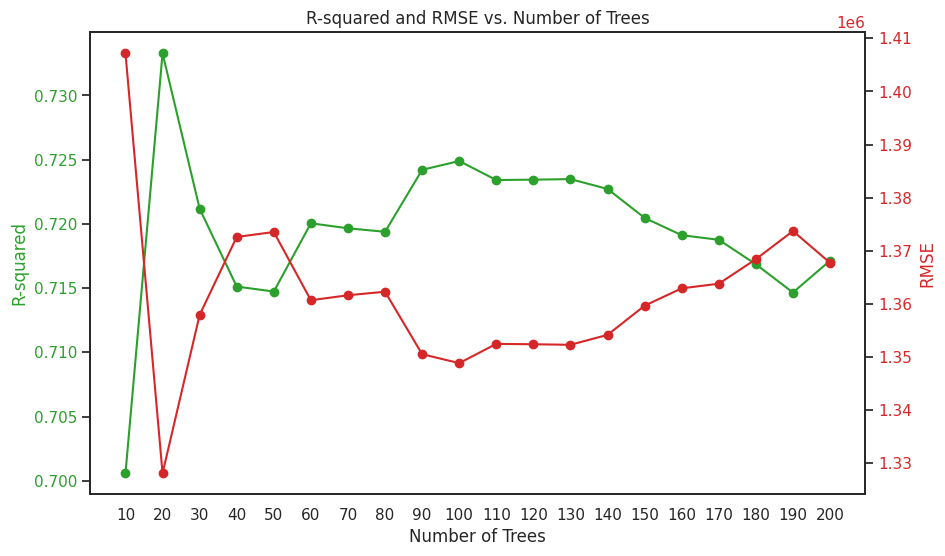

In [65]:
fix, ax1 = plt.subplots(figsize = (10,6))
sns.set(style='white')

ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('R-squared', color="tab:green")
ax1.plot(estimator_df_rf.index, estimator_df_rf['R-squared'], color='tab:green')
ax1.scatter(estimator_df_rf.index, estimator_df_rf['R-squared'], color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Secondary y-axis for RMSE
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='tab:red')
ax2.plot(estimator_df_rf.index, estimator_df_rf['RMSE'], color='tab:red')
ax2.scatter(estimator_df_rf.index, estimator_df_rf['RMSE'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
plt.xticks(ticks=[i for i in range(10, 201, 10)])

plt.title('R-squared and RMSE vs. Number of Trees')
plt.show()

The safe choice for number of estimators appears to be 100.

In [66]:
# Here, we tried to make the parameter search equivalent to XGBoost since CatBoost's parameter choices are comparable

params_grid = {'min_samples_split':np.arange(2,20,2),
               'min_samples_leaf':np.arange(1,20,2),
               'max_features':[0.5,1,'sqrt','log2',None]}

rf_grid = RandomForestRegressor(n_estimators=100,  # Equivalent to number of trees
                           random_state=123,
                           verbose=0)

grid_search = GridSearchCV(rf_grid,
                           params_grid,
                           cv = 2,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train_processed, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

rf_model = grid_search.best_estimator_

Fitting 2 folds for each of 450 candidates, totalling 900 fits
Best Parameters:  {'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6}
Best Negative Mean Squared Error:  -1935465122793.5513


### Randomforest

In [67]:
# Evaluation
pred_price = rf_model.predict(X_test_processed)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 1988934258917.83 
 RMSE = 1410295.81
 r-squared = 0.699


In [68]:
model_performances = pd.concat([model_performances,
           pd.DataFrame({'model':['randomforest'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})])
model_performances

model           mse          rmse  r_squared
0  original xgboost  2.032649e+12  1.425710e+06   0.692655
0          catboost  2.429561e+12  1.558705e+06   0.632641
0      randomforest  1.988934e+12  1.410296e+06   0.699265

In [69]:
def plot_features(columns, importances):
    df = (pd.DataFrame({'features':columns,'feature_importances':importances})
          .sort_values('feature_importances',ascending = False)
          .reset_index(drop = True))

    fig, ax = plt.subplots()
    ax.barh(df['features'],df['feature_importances'])
    ax.set_ylabel('features')
    ax.set_xlabel('feature importances')

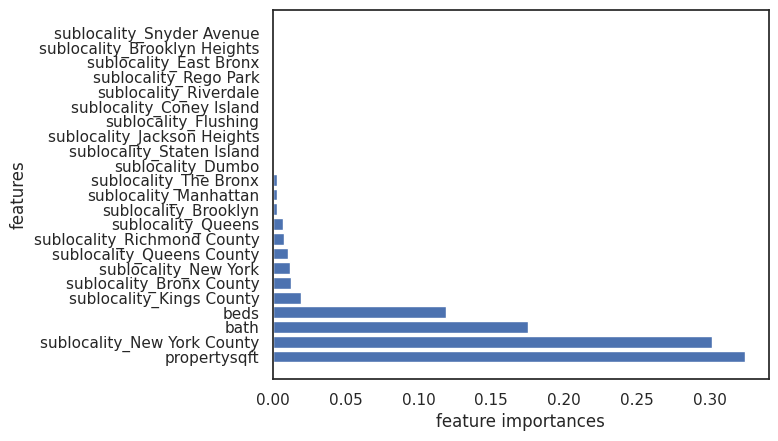

In [70]:
# Get the column names for the one-hot encoded features
encoded_feature_names = ohe.get_feature_names_out(input_features=X_train[categorical_features].columns)

# Create a DataFrame from the processed array
X_train_processed_df = pd.DataFrame(X_train_processed, columns=np.concatenate([X_train_numeric.columns, encoded_feature_names]))

plot_features(X_train_processed_df.columns,rf_model.feature_importances_)

### XGBRegressor using the onehot encoded categorical values

In [71]:
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}

xg_grid = xgb.XGBRegressor(objective = "reg:squarederror",
                           booster = 'dart',
                           n_estimators = 13,
                           seed = 123,
                           enable_categorical=True)

grid_search = GridSearchCV(xg_grid,
                           params_grid,
                           cv = 2,
                           scoring = "neg_mean_squared_error",
                           verbose = 1)

grid_search.fit(X_train_processed_df, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

xg_model2 = grid_search.best_estimator_

Fitting 2 folds for each of 405 candidates, totalling 810 fits
Best Parameters:  {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 1.0}
Best Negative Mean Squared Error:  -1853656089490.1968


In [72]:
# Evaluation
pred_price = xg_model2.predict(X_test_processed)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 2097635713375.10 
 RMSE = 1448321.69
 r-squared = 0.683


In [73]:
model_performances = pd.concat([model_performances,
           pd.DataFrame({'model':['original xgboost w/one_hot_encoding'],
                                   'mse':[mse],
                                   'rmse':[rmse],
                                   'r_squared':[r_squared]})])
model_performances

model           mse          rmse  r_squared
0                     original xgboost  2.032649e+12  1.425710e+06   0.692655
0                             catboost  2.429561e+12  1.558705e+06   0.632641
0                         randomforest  1.988934e+12  1.410296e+06   0.699265
0  original xgboost w/one_hot_encoding  2.097636e+12  1.448322e+06   0.682829

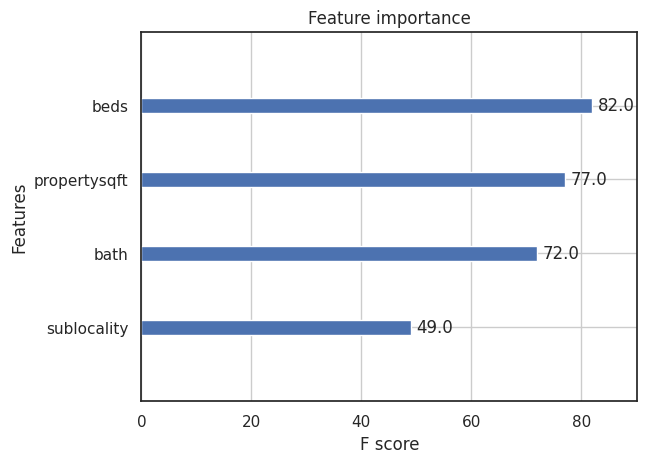

In [74]:
xgb.plot_importance(xg_model)
plt.show()

# Keeping the Models constant but changing the preprocessing
Let's redo the preprocessing phase to see if we can get better results for the model proposed by Scott.

Project

In [75]:
import pandas as pd
df = pd.read_csv('NY-House-Dataset.csv')
df

BROKERTITLE                TYPE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                   Brokered by Serhant      Condo for sale   
2                                Brokered by Sowae Corp      House for sale   
3                                   Brokered by COMPASS      Condo for sale   
4     Brokered by Sotheby's International Realty - E...  Townhouse for sale   
...                                                 ...                 ...   
4796                                Brokered by COMPASS      Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc      Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave      Co-op for sale   
4799            Brokered by E Realty International Corp      Condo for sale   
4800                 Brokered by Nyc Realty Brokers Llc      Co-op for sale   

          PRICE  BEDS       BATH  PROPERTYSQFT  \
0        315000     2   2.000000   1400.000000   
1     195000000     7  10.000000  17545.000000   
2        260000     4   2.000000   2015.000000   
3         69000     3   1.000000    445.000000   
4      55000000     7   2.373861  14175.000000   
...         ...   ...        ...           ...   
4796     599000     1   1.000000   2184.207862   
4797     245000     1   1.000000   2184.207862   
4798    1275000     1   1.000000   2184.207862   
4799     598125     2   1.000000    655.000000   
4800     349000     1   1.000000    750.000000   

                                                ADDRESS  \
0                                  2 E 55th St Unit 803   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2                                      620 Sinclair Ave   
3                               2 E 55th St Unit 908W33   
4                                           5 E 64th St   
...                                                 ...   
4796                               222 E 80th St Apt 3A   
4797                                97-40 62 Dr Unit Lg   
4798                          427 W 21st St Unit Garden   
4799                           91-23 Corona Ave Unit 4G   
4800                            460 Neptune Ave Apt 14O   

                        STATE  \
0          New York, NY 10022   
1          New York, NY 10019   
2     Staten Island, NY 10312   
3         Manhattan, NY 10022   
4          New York, NY 10065   
...                       ...   
4796      Manhattan, NY 10075   
4797      Rego Park, NY 11374   
4798       New York, NY 10011   
4799       Elmhurst, NY 11373   
4800       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
1     Central Park Tower Penthouse-217 W 57th New Yo...   
2               620 Sinclair AveStaten Island, NY 10312   
3            2 E 55th St Unit 908W33Manhattan, NY 10022   
4                         5 E 64th StNew York, NY 10065   
...                                                 ...   
4796            222 E 80th St Apt 3AManhattan, NY 10075   
4797             97-40 62 Dr Unit LgRego Park, NY 11374   
4798        427 W 21st St Unit GardenNew York, NY 10011   
4799         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
1                  United States         New York  New York County   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
4                  United States         New York  New York County   
...                          ...              ...              ...   
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York

One thing that is immediatly noticable is that the street name has not been recorded properly. We will deal with this in preprocessing.

In [76]:
df['STREET_NAME'][100:120]

100        Bay Ridge
101    Staten Island
102         New York
103         Brooklyn
104         Brooklyn
105    Staten Island
106         Brooklyn
107        Manhattan
108        Manhattan
109         New York
110         Brooklyn
111    Staten Island
112        The Bronx
113         Brooklyn
114           Queens
115         Brooklyn
116           Queens
117           Queens
118    Staten Island
119         New York
Name: STREET_NAME, dtype: object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [78]:
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

Lets check the plot between PropertySqft and Price since those would intuitively have the most correlation.

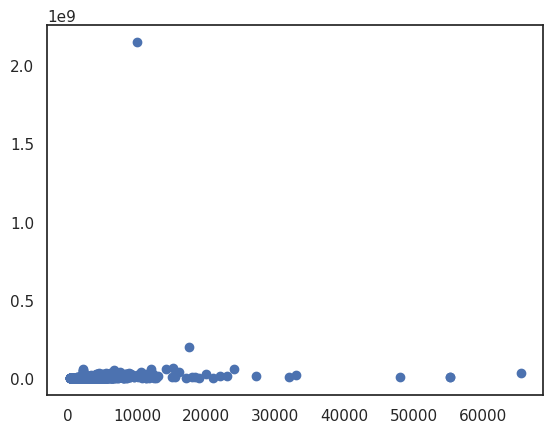

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(df['PROPERTYSQFT'],df['PRICE'])

There is a huge outlier ruining the entire shape of the data

In [80]:
print(df.loc[df['PRICE'].idxmax()])

BROKERTITLE                              Brokered by ANNE LOPA REAL ESTATE
TYPE                                                        House for sale
PRICE                                                           2147483647
BEDS                                                                     7
BATH                                                                   6.0
PROPERTYSQFT                                                       10000.0
ADDRESS                                                 6659-6675 Amboy Rd
STATE                                                   New York, NY 10309
MAIN_ADDRESS                          6659-6675 Amboy RdNew York, NY 10309
ADMINISTRATIVE_AREA_LEVEL_2                                  United States
LOCALITY                                                          New York
SUBLOCALITY                                                Richmond County
STREET_NAME                                                  Staten Island
LONG_NAME                

Locating this address on zillow shows that the actual price of the house is actually $2,595,000. Someone increased the magnitude a thousandfold while
recording the data!

In [81]:
df.at[304,'PRICE'] = 2595000

In [82]:
df.iloc[304]['PRICE']

2595000

The price has now been changed

In [83]:
print(df.loc[df['PRICE'].idxmax()])

BROKERTITLE                                                  Brokered by Serhant
TYPE                                                              Condo for sale
PRICE                                                                  195000000
BEDS                                                                           7
BATH                                                                        10.0
PROPERTYSQFT                                                             17545.0
ADDRESS                        Central Park Tower Penthouse-217 W 57th New Yo...
STATE                                                         New York, NY 10019
MAIN_ADDRESS                   Central Park Tower Penthouse-217 W 57th New Yo...
ADMINISTRATIVE_AREA_LEVEL_2                                        United States
LOCALITY                                                                New York
SUBLOCALITY                                                      New York County
STREET_NAME                 

Looking up this property on zillow, the value might be correct, but it does not represent an actual portion of the population.


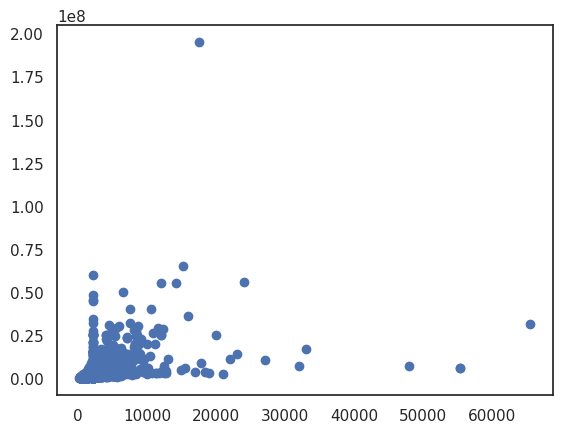

In [84]:
fig, ax = plt.subplots()
ax.scatter(df['PROPERTYSQFT'],df['PRICE'])

As we can see, the data looks slightly better but this outlier is still causing problems, so lets just drop it

In [85]:
df.drop([1],inplace = True)

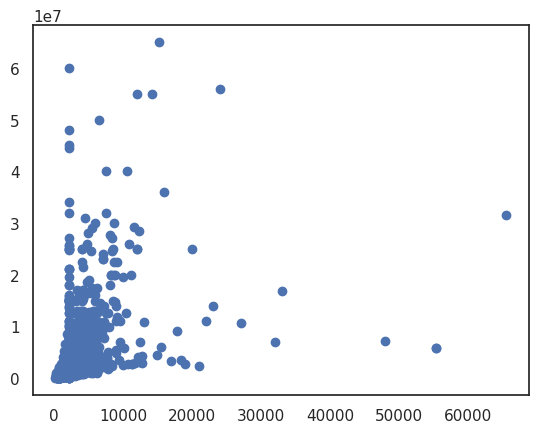

In [86]:
fig, ax = plt.subplots()
ax.scatter(df['PROPERTYSQFT'],df['PRICE'])

The data looks much better, but it could still do better.

In [87]:
df.iloc[100:120]

BROKERTITLE  \
101                  Brokered by Top Choice Realty LLC   
102                             Built by Toll Brothers   
103                   Brokered by Cross Country Realty   
104           Brokered by Charles Rutenberg Realty Inc   
105                      Brokered by AmeriHomes Realty   
106      Brokered by Douglas Elliman - 187 Seventh Ave   
107                 Brokered by Avenues - Headquarters   
108              Brokered by Corcoran Chelsea/Flatiron   
109  Brokered by Sotheby's International Realty - E...   
110                                           NoBroker   
111            Brokered by Compass Realty Central Inc.   
112     Brokered by Douglas Elliman - 3544 Johnson Ave   
113                             Brokered by Sowae Corp   
114                             Brokered by Sowae Corp   
115                             Brokered by Sowae Corp   
116                             Brokered by Sowae Corp   
117                             Brokered by Sowae Corp   
118                     Brokered by Winzone Realty Inc   
119                     Brokered by Corcoran East Side   
120                             Brokered by Exp Realty   

                           TYPE     PRICE  BEDS      BATH  PROPERTYSQFT  \
101              House for sale    899000     3  2.000000   1440.000000   
102                    For sale   2280000     2  2.000000   1400.000000   
103                 Coming Soon    649000     4  3.000000   2184.207862   
104                     Pending    739000     6  4.000000   2184.207862   
105              House for sale   1495000     4  2.373861   3000.000000   
106              House for sale   3950000     5  2.000000   3528.000000   
107              Condo for sale    325000     2  1.000000    979.000000   
108                     Pending    299999     3  1.000000   2184.207862   
109          Townhouse for sale   2695000     6  5.000000   4720.000000   
110                     Pending   4800000     6  2.373861   3958.000000   
111              House for sale    694000     3  3.000000   1360.000000   
112              House for sale    688888     4  2.000000   2846.000000   
113              House for sale    400000     4  2.000000   1980.000000   
114  Multi-family home for sale    346000     5  2.000000   2184.207862   
115              House for sale    400000     4  2.000000   1980.000000   
116  Multi-family home for sale    346000     5  2.000000   2184.207862   
117              House for sale    265000     3  1.000000   2184.207862   
118              House for sale    319000     3  2.000000   1224.000000   
119          Townhouse for sale  24800000     6  8.000000   2184.207862   
120              House for sale   1100000     9  4.000000   3276.000000   

                   ADDRESS                          STATE  \
101         40 Adelphi Ave        Staten Island, NY 10309   
102      The Rockwell # 6E             New York, NY 10025   
103         194 Carroll St             Brooklyn, NY 11231   
104             38 Dare Ct             Brooklyn, NY 11229   
105              31 4th Ct        Staten Island, NY 10312   
106             591 4th St             Brooklyn, NY 11215   
107  122 E 102nd St Apt 5B             New York, NY 10029   
108   215 W 75th St Apt 4D             New York, NY 10023   
109        327 Convent Ave             New York, NY 10031   
110           1151 83rd St             Brooklyn, NY 11228   
111      364 Armstrong Ave        Staten Island, NY 10308   
112           761 S Oak Dr                Bronx, NY 10467   
113        781 Sheperd Ave             Brooklyn, NY 11208   
114        103-12 104th St           Ozone Park, NY 11417   
115        781 Sheperd Ave             Brooklyn, NY 11208   
116        103-12 104th St           Ozone Park, NY 11417   
117        135-38 224th St  Springfield Gardens, NY 11413   
118         57 Neutral Ave        Staten Island, NY 10306   
119           45 E 74th St             New York, NY 10021   
120         421 W 154th St  

Looking at the price column, so many of the values are the same. It seems there was some leniency in the recording of data, but
considering the amount of information PropertySqft has towards the price, having at some random value seems like throwing away the information,
and it might even be worse since our model will learn on bad data.

In [88]:
df[df['PROPERTYSQFT']==2184.207862]

BROKERTITLE            TYPE  \
6         Brokered by Douglas Elliman - 575 Madison Ave  Condo for sale   
12                                  Brokered by COMPASS  Co-op for sale   
13           Brokered by Jamie & Connie Real Estate Grp  Co-op for sale   
14                Brokered by Corcoran Chelsea/Flatiron  Co-op for sale   
26    Brokered by Nest Seekers International, Long I...  Co-op for sale   
...                                                 ...             ...   
4791                     Brokered by Corcoran East Side  Co-op for sale   
4793                       Brokered by Engel & V�������  Co-op for sale   
4796                                Brokered by COMPASS  Co-op for sale   
4797                    Brokered by Mjr Real Estate Llc  Co-op for sale   
4798      Brokered by Douglas Elliman - 575 Madison Ave  Co-op for sale   

        PRICE  BEDS  BATH  PROPERTYSQFT                    ADDRESS  \
6      899500     2   2.0   2184.207862     157 W 126th St Unit 1B   
12     259000     3   1.0   2184.207862      34-41 85th St Unit 1D   
13     430000     2   2.0   2184.207862   91-15 Lamont Ave Unit 6D   
14     895000     3   1.0   2184.207862          61 Jane St Apt 6N   
26     325000     1   1.0   2184.207862      35-45 81st St Unit E1   
...       ...   ...   ...           ...                        ...   
4791   370000     3   1.0   2184.207862       342 E 53rd St Apt 6C   
4793  1950000     2   4.0   2184.207862      700 Park Ave Unit 20A   
4796   599000     1   1.0   2184.207862       222 E 80th St Apt 3A   
4797   245000     1   1.0   2184.207862        97-40 62 Dr Unit Lg   
4798  1275000     1   1.0   2184.207862  427 W 21st St Unit Garden   

                          STATE  \
6            New York, NY 10027   
12    Jackson Heights, NY 11372   
13           Elmhurst, NY 11373   
14           New York, NY 10014   
26             Queens, NY 11372   
...                         ...   
4791         New York, NY 10022   
4793         New York, NY 10021   
4796        Manhattan, NY 10075   
4797        Rego Park, NY 11374   
4798         New York, NY 10011   

                                        MAIN_ADDRESS  \
6           157 W 126th St Unit 1BNew York, NY 10027   
12    34-41 85th St Unit 1DJackson Heights, NY 11372   
13        91-15 Lamont Ave Unit 6DElmhurst, NY 11373   
14               61 Jane St Apt 6NNew York, NY 10014   
26             35-45 81st St Unit E1Queens, NY 11372   
...                                              ...   
4791          342 E 53rd St Apt 6CNew York, NY 10022   
4793         700 Park Ave Unit 20ANew York, NY 10021   
4796         222 E 80th St Apt 3AManhattan, NY 10075   
4797          97-40 62 Dr Unit LgRego Park, NY 11374   
4798     427 W 21st St Unit GardenNew York, NY 10011   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
6                       New York  New York County         New York   
12                      New York    Queens County           Queens   
13                      New York    Queens County           Queens   
14                      New York  New York County         New York   
26                      New York    Queens County           Queens   
...                          ...              ...              ...   
4791                    New York  New York County         New York   
4793                    New York  New York County         New York   
4796                    New York  New York County         New York   
4797               United States         New York    Queens County   
4798               United States         New York  New York County   

          STREET_NAME         LONG_NAME  \
6           Manhattan               157   
12           Flushing             34-41   
13           Elmhurst             91-15   
14          Manhattan                61   
26    Jackson Heights             35-45   
...               ...               ...   
4791        Manhattan               342   
4793        Manhattan  

As we can see, there are 1621 rows with this price value. I believe removing them would improve our model since these wrong values
represent a third of the dataframe.

In [89]:
df.drop(df.loc[df['PROPERTYSQFT']==2184.207862].index, inplace=True)

In [90]:
df

BROKERTITLE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave   
2                                Brokered by Sowae Corp   
3                                   Brokered by COMPASS   
4     Brokered by Sotheby's International Realty - E...   
5                                Brokered by Sowae Corp   
...                                                 ...   
4792                       Brokered by Ilite Realty Inc   
4794                   Brokered by Brown Harris Stevens   
4795                            Brokered by RE MAX Edge   
4799            Brokered by E Realty International Corp   
4800                 Brokered by Nyc Realty Brokers Llc   

                            TYPE     PRICE  BEDS      BATH  PROPERTYSQFT  \
0                 Condo for sale    315000     2  2.000000        1400.0   
2                 House for sale    260000     4  2.000000        2015.0   
3                 Condo for sale     69000     3  1.000000         445.0   
4             Townhouse for sale  55000000     7  2.373861       14175.0   
5                 House for sale    690000     5  2.000000        4004.0   
...                          ...       ...   ...       ...           ...   
4792  Multi-family home for sale   1700000     3  7.000000        7854.0   
4794              Condo for sale    945000     2  2.000000         903.0   
4795  Multi-family home for sale   2999999    15  9.000000        3600.0   
4799              Condo for sale    598125     2  1.000000         655.0   
4800              Co-op for sale    349000     1  1.000000         750.0   

                                       ADDRESS                    STATE  \
0                         2 E 55th St Unit 803       New York, NY 10022   
2                             620 Sinclair Ave  Staten Island, NY 10312   
3                      2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                  5 E 64th St       New York, NY 10065   
5                                  584 Park Pl       Brooklyn, NY 11238   
...                                        ...                      ...   
4792                               448 40th St       Brooklyn, NY 11232   
4794  2351 Adam Clayton Powell Jr Blvd Apt 614      Manhattan, NY 10030   
4795                       2825-2827 W 15th St       Brooklyn, NY 11224   
4799                  91-23 Corona Ave Unit 4G       Elmhurst, NY 11373   
4800                   460 Neptune Ave Apt 14O       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
2               620 Sinclair AveStaten Island, NY 10312   
3            2 E 55th St Unit 908W33Manhattan, NY 10022   
4                         5 E 64th StNew York, NY 10065   
5                         584 Park PlBrooklyn, NY 11238   
...                                                 ...   
4792                      448 40th StBrooklyn, NY 11232   
4794  2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...   
4795              2825-2827 W 15th StBrooklyn, NY 11224   
4799         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
4                  United States         New York  New York County   
5                  United States         New York     Kings County   
...                          ...              ...              ...   
4792               United States         New York     Kings County   
4794                    New York  New York County         New York   
4795               United States         New York     Kings County   
4799                    New York    Queens County           Queens   
4800                    New York     Kings

Considering that there are still 3179 rows of data, a model should still be able to learn.

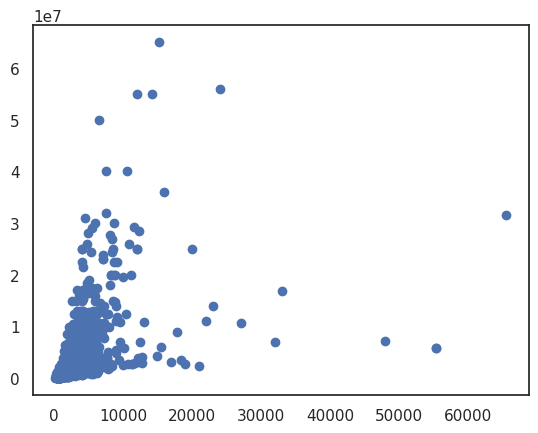

In [91]:
fig = plt.figure()
plt.scatter(df['PROPERTYSQFT'],df['PRICE'])

In [92]:
df.to_csv('data\\NY_Housing_Temp.csv', encoding='utf-8', index=False)

In [93]:
df

BROKERTITLE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave   
2                                Brokered by Sowae Corp   
3                                   Brokered by COMPASS   
4     Brokered by Sotheby's International Realty - E...   
5                                Brokered by Sowae Corp   
...                                                 ...   
4792                       Brokered by Ilite Realty Inc   
4794                   Brokered by Brown Harris Stevens   
4795                            Brokered by RE MAX Edge   
4799            Brokered by E Realty International Corp   
4800                 Brokered by Nyc Realty Brokers Llc   

                            TYPE     PRICE  BEDS      BATH  PROPERTYSQFT  \
0                 Condo for sale    315000     2  2.000000        1400.0   
2                 House for sale    260000     4  2.000000        2015.0   
3                 Condo for sale     69000     3  1.000000         445.0   
4             Townhouse for sale  55000000     7  2.373861       14175.0   
5                 House for sale    690000     5  2.000000        4004.0   
...                          ...       ...   ...       ...           ...   
4792  Multi-family home for sale   1700000     3  7.000000        7854.0   
4794              Condo for sale    945000     2  2.000000         903.0   
4795  Multi-family home for sale   2999999    15  9.000000        3600.0   
4799              Condo for sale    598125     2  1.000000         655.0   
4800              Co-op for sale    349000     1  1.000000         750.0   

                                       ADDRESS                    STATE  \
0                         2 E 55th St Unit 803       New York, NY 10022   
2                             620 Sinclair Ave  Staten Island, NY 10312   
3                      2 E 55th St Unit 908W33      Manhattan, NY 10022   
4                                  5 E 64th St       New York, NY 10065   
5                                  584 Park Pl       Brooklyn, NY 11238   
...                                        ...                      ...   
4792                               448 40th St       Brooklyn, NY 11232   
4794  2351 Adam Clayton Powell Jr Blvd Apt 614      Manhattan, NY 10030   
4795                       2825-2827 W 15th St       Brooklyn, NY 11224   
4799                  91-23 Corona Ave Unit 4G       Elmhurst, NY 11373   
4800                   460 Neptune Ave Apt 14O       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
2               620 Sinclair AveStaten Island, NY 10312   
3            2 E 55th St Unit 908W33Manhattan, NY 10022   
4                         5 E 64th StNew York, NY 10065   
5                         584 Park PlBrooklyn, NY 11238   
...                                                 ...   
4792                      448 40th StBrooklyn, NY 11232   
4794  2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...   
4795              2825-2827 W 15th StBrooklyn, NY 11224   
4799         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
4800          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
2                  United States         New York  Richmond County   
3                  United States         New York  New York County   
4                  United States         New York  New York County   
5                  United States         New York     Kings County   
...                          ...              ...              ...   
4792               United States         New York     Kings County   
4794                    New York  New York County         New York   
4795               United States         New York     Kings County   
4799                    New York    Queens County           Queens   
4800                    New York     Kings

In [94]:
import re
df['zip_code'] = df['FORMATTED_ADDRESS'].apply(lambda address: int(re.findall(r"\d{5}", address)[0]))
url = 'https://github.com/erikgregorywebb/nyc-housing/blob/master/Data/nyc-zip-codes.csv?raw=true'

zip_codes = pd.read_csv(url)
zip_codes = zip_codes.rename(columns={'ZipCode':'zip_code'})


In [95]:
df = df.merge(zip_codes, on='zip_code')
df[['FORMATTED_ADDRESS', 'zip_code']].head()

FORMATTED_ADDRESS  zip_code
0  Regis Residence, 2 E 55th St #803, New York, N...     10022
1     620 Sinclair Ave, Staten Island, NY 10312, USA     10312
2               2 E 55th St, New York, NY 10022, USA     10022
3               5 E 64th St, New York, NY 10065, USA     10065
4               584 Park Pl, Brooklyn, NY 11238, USA     11238

In [96]:
df

BROKERTITLE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave   
1                                Brokered by Sowae Corp   
2                                   Brokered by COMPASS   
3     Brokered by Sotheby's International Realty - E...   
4                                Brokered by Sowae Corp   
...                                                 ...   
3090                       Brokered by Ilite Realty Inc   
3091                   Brokered by Brown Harris Stevens   
3092                            Brokered by RE MAX Edge   
3093            Brokered by E Realty International Corp   
3094                 Brokered by Nyc Realty Brokers Llc   

                            TYPE     PRICE  BEDS      BATH  PROPERTYSQFT  \
0                 Condo for sale    315000     2  2.000000        1400.0   
1                 House for sale    260000     4  2.000000        2015.0   
2                 Condo for sale     69000     3  1.000000         445.0   
3             Townhouse for sale  55000000     7  2.373861       14175.0   
4                 House for sale    690000     5  2.000000        4004.0   
...                          ...       ...   ...       ...           ...   
3090  Multi-family home for sale   1700000     3  7.000000        7854.0   
3091              Condo for sale    945000     2  2.000000         903.0   
3092  Multi-family home for sale   2999999    15  9.000000        3600.0   
3093              Condo for sale    598125     2  1.000000         655.0   
3094              Co-op for sale    349000     1  1.000000         750.0   

                                       ADDRESS                    STATE  \
0                         2 E 55th St Unit 803       New York, NY 10022   
1                             620 Sinclair Ave  Staten Island, NY 10312   
2                      2 E 55th St Unit 908W33      Manhattan, NY 10022   
3                                  5 E 64th St       New York, NY 10065   
4                                  584 Park Pl       Brooklyn, NY 11238   
...                                        ...                      ...   
3090                               448 40th St       Brooklyn, NY 11232   
3091  2351 Adam Clayton Powell Jr Blvd Apt 614      Manhattan, NY 10030   
3092                       2825-2827 W 15th St       Brooklyn, NY 11224   
3093                  91-23 Corona Ave Unit 4G       Elmhurst, NY 11373   
3094                   460 Neptune Ave Apt 14O       Brooklyn, NY 11224   

                                           MAIN_ADDRESS  \
0                2 E 55th St Unit 803New York, NY 10022   
1               620 Sinclair AveStaten Island, NY 10312   
2            2 E 55th St Unit 908W33Manhattan, NY 10022   
3                         5 E 64th StNew York, NY 10065   
4                         584 Park PlBrooklyn, NY 11238   
...                                                 ...   
3090                      448 40th StBrooklyn, NY 11232   
3091  2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...   
3092              2825-2827 W 15th StBrooklyn, NY 11224   
3093         91-23 Corona Ave Unit 4GElmhurst, NY 11373   
3094          460 Neptune Ave Apt 14OBrooklyn, NY 11224   

     ADMINISTRATIVE_AREA_LEVEL_2         LOCALITY      SUBLOCALITY  \
0                New York County         New York        Manhattan   
1                  United States         New York  Richmond County   
2                  United States         New York  New York County   
3                  United States         New York  New York County   
4                  United States         New York     Kings County   
...                          ...              ...              ...   
3090               United States         New York     Kings County   
3091                    New York  New York County         New York   
3092               United States         New York     Kings County   
3093                    New York    Queens County           Queens   
3094                    New York     Kings

In [97]:
df = df.drop(['ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'LONG_NAME', 'FORMATTED_ADDRESS'], axis=1)

In [98]:
df

BROKERTITLE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave   
1                                Brokered by Sowae Corp   
2                                   Brokered by COMPASS   
3     Brokered by Sotheby's International Realty - E...   
4                                Brokered by Sowae Corp   
...                                                 ...   
3090                       Brokered by Ilite Realty Inc   
3091                   Brokered by Brown Harris Stevens   
3092                            Brokered by RE MAX Edge   
3093            Brokered by E Realty International Corp   
3094                 Brokered by Nyc Realty Brokers Llc   

                            TYPE     PRICE  BEDS      BATH  PROPERTYSQFT  \
0                 Condo for sale    315000     2  2.000000        1400.0   
1                 House for sale    260000     4  2.000000        2015.0   
2                 Condo for sale     69000     3  1.000000         445.0   
3             Townhouse for sale  55000000     7  2.373861       14175.0   
4                 House for sale    690000     5  2.000000        4004.0   
...                          ...       ...   ...       ...           ...   
3090  Multi-family home for sale   1700000     3  7.000000        7854.0   
3091              Condo for sale    945000     2  2.000000         903.0   
3092  Multi-family home for sale   2999999    15  9.000000        3600.0   
3093              Condo for sale    598125     2  1.000000         655.0   
3094              Co-op for sale    349000     1  1.000000         750.0   

           STREET_NAME   LATITUDE  LONGITUDE  zip_code        Borough  \
0     East 55th Street  40.761255 -73.974483     10022      Manhattan   
1        Staten Island  40.541805 -74.196109     10312  Staten Island   
2             New York  40.761398 -73.974613     10022      Manhattan   
3             New York  40.767224 -73.969856     10065      Manhattan   
4             Brooklyn  40.674363 -73.958725     11238       Brooklyn   
...                ...        ...        ...       ...            ...   
3090          Brooklyn  40.651222 -74.005780     11232       Brooklyn   
3091         Manhattan  40.816711 -73.942050     10030      Manhattan   
3092          Brooklyn  40.578450 -73.982739     11224       Brooklyn   
3093          Flushing  40.742770 -73.872752     11373         Queens   
3094      Coney Island  40.579147 -73.970949     11224       Brooklyn   

                       Neighborhood  
0     Gramercy Park and Murray Hill  
1                       South Shore  
2     Gramercy Park and Murray Hill  
3                   Upper East Side  
4                  Central Brooklyn  
...                             ...  
3090                    Sunset Park  
3091                 Central Harlem  
3092              Southern Brooklyn  
3093                    West Queens  
3094              Southern Brooklyn  

[3095 rows x 12 columns]

In [99]:
df.drop(['STREET_NAME'],axis = 1,inplace = True)

In [100]:
df

BROKERTITLE  \
0           Brokered by Douglas Elliman  -111 Fifth Ave   
1                                Brokered by Sowae Corp   
2                                   Brokered by COMPASS   
3     Brokered by Sotheby's International Realty - E...   
4                                Brokered by Sowae Corp   
...                                                 ...   
3090                       Brokered by Ilite Realty Inc   
3091                   Brokered by Brown Harris Stevens   
3092                            Brokered by RE MAX Edge   
3093            Brokered by E Realty International Corp   
3094                 Brokered by Nyc Realty Brokers Llc   

                            TYPE     PRICE  BEDS      BATH  PROPERTYSQFT  \
0                 Condo for sale    315000     2  2.000000        1400.0   
1                 House for sale    260000     4  2.000000        2015.0   
2                 Condo for sale     69000     3  1.000000         445.0   
3             Townhouse for sale  55000000     7  2.373861       14175.0   
4                 House for sale    690000     5  2.000000        4004.0   
...                          ...       ...   ...       ...           ...   
3090  Multi-family home for sale   1700000     3  7.000000        7854.0   
3091              Condo for sale    945000     2  2.000000         903.0   
3092  Multi-family home for sale   2999999    15  9.000000        3600.0   
3093              Condo for sale    598125     2  1.000000         655.0   
3094              Co-op for sale    349000     1  1.000000         750.0   

       LATITUDE  LONGITUDE  zip_code        Borough  \
0     40.761255 -73.974483     10022      Manhattan   
1     40.541805 -74.196109     10312  Staten Island   
2     40.761398 -73.974613     10022      Manhattan   
3     40.767224 -73.969856     10065      Manhattan   
4     40.674363 -73.958725     11238       Brooklyn   
...         ...        ...       ...            ...   
3090  40.651222 -74.005780     11232       Brooklyn   
3091  40.816711 -73.942050     10030      Manhattan   
3092  40.578450 -73.982739     11224       Brooklyn   
3093  40.742770 -73.872752     11373         Queens   
3094  40.579147 -73.970949     11224       Brooklyn   

                       Neighborhood  
0     Gramercy Park and Murray Hill  
1                       South Shore  
2     Gramercy Park and Murray Hill  
3                   Upper East Side  
4                  Central Brooklyn  
...                             ...  
3090                    Sunset Park  
3091                 Central Harlem  
3092              Southern Brooklyn  
3093                    West Queens  
3094              Southern Brooklyn  

[3095 rows x 11 columns]

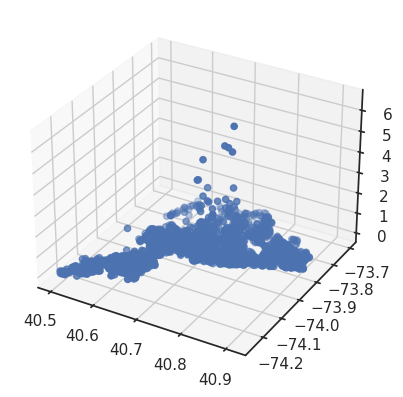

In [101]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df['LATITUDE'],df['LONGITUDE'],df['PRICE'])

plt.show()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BROKERTITLE   3095 non-null   object 
 1   TYPE          3095 non-null   object 
 2   PRICE         3095 non-null   int64  
 3   BEDS          3095 non-null   int64  
 4   BATH          3095 non-null   float64
 5   PROPERTYSQFT  3095 non-null   float64
 6   LATITUDE      3095 non-null   float64
 7   LONGITUDE     3095 non-null   float64
 8   zip_code      3095 non-null   int64  
 9   Borough       3095 non-null   object 
 10  Neighborhood  3095 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 266.1+ KB


In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['TYPE'])
df.drop('TYPE',axis = 1,inplace = True)
df['TYPE'] = label
label = le.fit_transform(df['BROKERTITLE'])
df.drop('BROKERTITLE',axis = 1,inplace = True)
df['BROKERTITLE'] = label

In [104]:
df

PRICE  BEDS      BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  zip_code  \
0       315000     2  2.000000        1400.0  40.761255 -73.974483     10022   
1       260000     4  2.000000        2015.0  40.541805 -74.196109     10312   
2        69000     3  1.000000         445.0  40.761398 -73.974613     10022   
3     55000000     7  2.373861       14175.0  40.767224 -73.969856     10065   
4       690000     5  2.000000        4004.0  40.674363 -73.958725     11238   
...        ...   ...       ...           ...        ...        ...       ...   
3090   1700000     3  7.000000        7854.0  40.651222 -74.005780     11232   
3091    945000     2  2.000000         903.0  40.816711 -73.942050     10030   
3092   2999999    15  9.000000        3600.0  40.578450 -73.982739     11224   
3093    598125     2  1.000000         655.0  40.742770 -73.872752     11373   
3094    349000     1  1.000000         750.0  40.579147 -73.970949     11224   

            Borough                   Neighborhood  TYPE  BROKERTITLE  
0         Manhattan  Gramercy Park and Murray Hill     2          220  
1     Staten Island                    South Shore     6          683  
2         Manhattan  Gramercy Park and Murray Hill     2          123  
3         Manhattan                Upper East Side    10          680  
4          Brooklyn               Central Brooklyn     6          683  
...             ...                            ...   ...          ...  
3090       Brooklyn                    Sunset Park     8          374  
3091      Manhattan                 Central Harlem     2           91  
3092       Brooklyn              Southern Brooklyn     8          592  
3093         Queens                    West Queens     2          252  
3094       Brooklyn              Southern Brooklyn     0          533  

[3095 rows x 11 columns]

In [105]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['TYPE']]).toarray())
df = df.join(enc_df)


In [106]:
dum_df = pd.get_dummies(df, columns=['BROKERTITLE'], prefix=['Type_is'] )
dum_df

PRICE  BEDS      BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  zip_code  \
0       315000     2  2.000000        1400.0  40.761255 -73.974483     10022   
1       260000     4  2.000000        2015.0  40.541805 -74.196109     10312   
2        69000     3  1.000000         445.0  40.761398 -73.974613     10022   
3     55000000     7  2.373861       14175.0  40.767224 -73.969856     10065   
4       690000     5  2.000000        4004.0  40.674363 -73.958725     11238   
...        ...   ...       ...           ...        ...        ...       ...   
3090   1700000     3  7.000000        7854.0  40.651222 -74.005780     11232   
3091    945000     2  2.000000         903.0  40.816711 -73.942050     10030   
3092   2999999    15  9.000000        3600.0  40.578450 -73.982739     11224   
3093    598125     2  1.000000         655.0  40.742770 -73.872752     11373   
3094    349000     1  1.000000         750.0  40.579147 -73.970949     11224   

            Borough                   Neighborhood  TYPE  ...  Type_is_755  \
0         Manhattan  Gramercy Park and Murray Hill     2  ...        False   
1     Staten Island                    South Shore     6  ...        False   
2         Manhattan  Gramercy Park and Murray Hill     2  ...        False   
3         Manhattan                Upper East Side    10  ...        False   
4          Brooklyn               Central Brooklyn     6  ...        False   
...             ...                            ...   ...  ...          ...   
3090       Brooklyn                    Sunset Park     8  ...        False   
3091      Manhattan                 Central Harlem     2  ...        False   
3092       Brooklyn              Southern Brooklyn     8  ...        False   
3093         Queens                    West Queens     2  ...        False   
3094       Brooklyn              Southern Brooklyn     0  ...        False   

      Type_is_756  Type_is_757  Type_is_758  Type_is_759  Type_is_760  \
0           False        False        False        False        False   
1           False        False        False        False        False   
2           False        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
3090        False        False        False        False        False   
3091        False        False        False        False        False   
3092        False        False        False        False        False   
3093        False        False        False        False        False   
3094        False        False        False        False        False   

      Type_is_761  Type_is_762  Type_is_763  Type_is_764  
0           False        False        False        False  
1           False        False        False        False  
2           False        False        False        False  
3           False        False        False        False  
4           False        False        False        False  
...           ...          ...          ...          ...  
3090        False        False        False        False  
3091        False        False        False        False  
3092        False        False        False        False  
3093        False        False        False        False  
3094        False        False        False        False  

[3095 rows x 786 columns]

In [107]:
df = df.merge(dum_df)

In [108]:
df

PRICE  BEDS      BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  zip_code  \
0       315000     2  2.000000        1400.0  40.761255 -73.974483     10022   
1       260000     4  2.000000        2015.0  40.541805 -74.196109     10312   
2        69000     3  1.000000         445.0  40.761398 -73.974613     10022   
3     55000000     7  2.373861       14175.0  40.767224 -73.969856     10065   
4       690000     5  2.000000        4004.0  40.674363 -73.958725     11238   
...        ...   ...       ...           ...        ...        ...       ...   
3356   1700000     3  7.000000        7854.0  40.651222 -74.005780     11232   
3357    945000     2  2.000000         903.0  40.816711 -73.942050     10030   
3358   2999999    15  9.000000        3600.0  40.578450 -73.982739     11224   
3359    598125     2  1.000000         655.0  40.742770 -73.872752     11373   
3360    349000     1  1.000000         750.0  40.579147 -73.970949     11224   

            Borough                   Neighborhood  TYPE  ...  Type_is_755  \
0         Manhattan  Gramercy Park and Murray Hill     2  ...        False   
1     Staten Island                    South Shore     6  ...        False   
2         Manhattan  Gramercy Park and Murray Hill     2  ...        False   
3         Manhattan                Upper East Side    10  ...        False   
4          Brooklyn               Central Brooklyn     6  ...        False   
...             ...                            ...   ...  ...          ...   
3356       Brooklyn                    Sunset Park     8  ...        False   
3357      Manhattan                 Central Harlem     2  ...        False   
3358       Brooklyn              Southern Brooklyn     8  ...        False   
3359         Queens                    West Queens     2  ...        False   
3360       Brooklyn              Southern Brooklyn     0  ...        False   

      Type_is_756  Type_is_757  Type_is_758  Type_is_759  Type_is_760  \
0           False        False        False        False        False   
1           False        False        False        False        False   
2           False        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
3356        False        False        False        False        False   
3357        False        False        False        False        False   
3358        False        False        False        False        False   
3359        False        False        False        False        False   
3360        False        False        False        False        False   

      Type_is_761  Type_is_762  Type_is_763  Type_is_764  
0           False        False        False        False  
1           False        False        False        False  
2           False        False        False        False  
3           False        False        False        False  
4           False        False        False        False  
...           ...          ...          ...          ...  
3356        False        False        False        False  
3357        False        False        False        False  
3358        False        False        False        False  
3359        False        False        False        False  
3360        False        False        False        False  

[3361 rows x 787 columns]

In [109]:
df.drop(['Borough','Neighborhood'],axis = 1,inplace =True)

In [110]:
df.drop(['TYPE','BROKERTITLE'],axis = 1,inplace =True)


In [111]:
df

PRICE  BEDS      BATH  PROPERTYSQFT   LATITUDE  LONGITUDE  zip_code  \
0       315000     2  2.000000        1400.0  40.761255 -73.974483     10022   
1       260000     4  2.000000        2015.0  40.541805 -74.196109     10312   
2        69000     3  1.000000         445.0  40.761398 -73.974613     10022   
3     55000000     7  2.373861       14175.0  40.767224 -73.969856     10065   
4       690000     5  2.000000        4004.0  40.674363 -73.958725     11238   
...        ...   ...       ...           ...        ...        ...       ...   
3356   1700000     3  7.000000        7854.0  40.651222 -74.005780     11232   
3357    945000     2  2.000000         903.0  40.816711 -73.942050     10030   
3358   2999999    15  9.000000        3600.0  40.578450 -73.982739     11224   
3359    598125     2  1.000000         655.0  40.742770 -73.872752     11373   
3360    349000     1  1.000000         750.0  40.579147 -73.970949     11224   

        0    1    2  ...  Type_is_755  Type_is_756  Type_is_757  Type_is_758  \
0     0.0  0.0  1.0  ...        False        False        False        False   
1     0.0  0.0  0.0  ...        False        False        False        False   
2     0.0  0.0  1.0  ...        False        False        False        False   
3     0.0  0.0  0.0  ...        False        False        False        False   
4     0.0  0.0  0.0  ...        False        False        False        False   
...   ...  ...  ...  ...          ...          ...          ...          ...   
3356  0.0  0.0  0.0  ...        False        False        False        False   
3357  0.0  0.0  1.0  ...        False        False        False        False   
3358  0.0  0.0  0.0  ...        False        False        False        False   
3359  0.0  0.0  1.0  ...        False        False        False        False   
3360  1.0  0.0  0.0  ...        False        False        False        False   

      Type_is_759  Type_is_760  Type_is_761  Type_is_762  Type_is_763  \
0           False        False        False        False        False   
1           False        False        False        False        False   
2           False        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
3356        False        False        False        False        False   
3357        False        False        False        False        False   
3358        False        False        False        False        False   
3359        False        False        False        False        False   
3360        False        False        False        False        False   

      Type_is_764  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
3356        False  
3357        False  
3358        False  
3359        False  
3360        False  

[3361 rows x 783 columns]

In [112]:
df.columns = df.columns.astype(str)

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor(random_state = 1)
X = df.drop('PRICE',axis =1)
y = df['PRICE']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3361 entries, 0 to 3360
Columns: 783 entries, PRICE to Type_is_764
dtypes: bool(765), float64(15), int64(3)
memory usage: 2.9 MB


In [115]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [116]:
model.score(X_test,y_test)

0.8421396148552374

In [117]:
%%time
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train,y_train)

Learning rate set to 0.047866
0:	learn: 4016254.0617766	total: 7.21ms	remaining: 7.21s
1:	learn: 3907379.8532891	total: 16.6ms	remaining: 8.26s
2:	learn: 3799831.4638767	total: 25.9ms	remaining: 8.6s
3:	learn: 3706223.3921940	total: 33.3ms	remaining: 8.3s
4:	learn: 3616166.1762314	total: 42.1ms	remaining: 8.38s
5:	learn: 3539365.9109361	total: 49.4ms	remaining: 8.18s
6:	learn: 3443181.4944412	total: 54.5ms	remaining: 7.73s
7:	learn: 3373422.8665481	total: 63.6ms	remaining: 7.89s
8:	learn: 3292804.5932895	total: 72.4ms	remaining: 7.97s
9:	learn: 3219553.4472291	total: 81.2ms	remaining: 8.04s
10:	learn: 3152309.6297697	total: 91.4ms	remaining: 8.21s
11:	learn: 3087427.1327669	total: 100ms	remaining: 8.23s
12:	learn: 3021479.1967546	total: 105ms	remaining: 7.94s
13:	learn: 2966485.7190938	total: 109ms	remaining: 7.68s
14:	learn: 2905516.8691630	total: 114ms	remaining: 7.47s
15:	learn: 2854749.4798020	total: 119ms	remaining: 7.31s
16:	learn: 2808356.5302398	total: 124ms	remaining: 7.14s
17

In [118]:
model.score(X_test,y_test)

0.8676313983408547

In [119]:
from sklearn.metrics import r2_score
pred = model.predict(X_test)
score = r2_score(pred,y_test)
print(score)

0.862088940963327


In [120]:
import xgboost as xg
model = xg.XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [121]:
model.score(X_test,y_test)

0.8520345292751452

In [122]:
pred = model.predict(X_test)
score = r2_score(pred,y_test)
print(score)

0.8552182473198958


In [123]:
import numpy as np
n_estimators = np.arange(5,50,1)
for est in n_estimators:
    xg_model = xg.XGBRegressor(objective = 'reg:squarederror',
                           n_estimators = est,
                           seed = 123,
                          )
    xg_model.fit(X_train,y_train)
    print(xg_model.score(X_test,y_test))

0.7623575778744501
0.7865674856695817
0.8031404111027218
0.8238885025691423
0.8337059192242302
0.8429831100944544
0.848678643663713
0.8508417797064411
0.8531472658324801
0.852914778625373
0.8534435124765695
0.853918886014754
0.8538723303958213
0.8542987266159573
0.854214409320321
0.8537313477327005
0.8524467306892499
0.8523690133039408
0.8525782181584619
0.8525937529044286
0.8526458673925356
0.8522189987650296
0.8518504848963506
0.8519821750533538
0.853422621453453
0.8532107240446043
0.8532000605014718
0.8530070895108512
0.853006561662307
0.8528017783428906
0.8526598062398355
0.8526743160986859
0.8526630316592101
0.852627865128618
0.8529663694672686
0.8530237188754446
0.8530277826868332
0.8528909767342043
0.8528193347208877
0.8527855798874846
0.852765159095506
0.8527844105052259
0.8531092861222983
0.85296442141966
0.8528813090378298


In [124]:
cbr = CatBoostRegressor(random_state = 1)

In [125]:
cbr.fit(X_train,y_train)

Learning rate set to 0.047866
0:	learn: 4014655.5799590	total: 4.1ms	remaining: 4.1s
1:	learn: 3908583.3803014	total: 7.79ms	remaining: 3.89s
2:	learn: 3796544.0932286	total: 11.5ms	remaining: 3.82s
3:	learn: 3692751.9132377	total: 15.1ms	remaining: 3.76s
4:	learn: 3605967.2738014	total: 18.7ms	remaining: 3.72s
5:	learn: 3529259.5927711	total: 22.5ms	remaining: 3.72s
6:	learn: 3442529.7207249	total: 26.1ms	remaining: 3.7s
7:	learn: 3362328.3799099	total: 29.7ms	remaining: 3.69s
8:	learn: 3286170.2498190	total: 33.7ms	remaining: 3.71s
9:	learn: 3210811.9054141	total: 40.4ms	remaining: 3.99s
10:	learn: 3151983.8803627	total: 44.9ms	remaining: 4.04s
11:	learn: 3091609.6713505	total: 49ms	remaining: 4.03s
12:	learn: 3027402.5724939	total: 52.8ms	remaining: 4.01s
13:	learn: 2970173.2331852	total: 56.6ms	remaining: 3.98s
14:	learn: 2915759.7855758	total: 60.1ms	remaining: 3.95s
15:	learn: 2858249.7428224	total: 63.8ms	remaining: 3.92s
16:	learn: 2805030.6790362	total: 67.4ms	remaining: 3.9s


In [126]:
cbr.score(X_test,y_test)

0.8762343505386577

In [127]:
pred = cbr.predict(X_test)
score = r2_score(pred,y_test)
print(score)

0.8705478787433466


In [128]:
importances = -np.sort(-cbr.feature_importances_)[0:20,]

In [129]:
def plot_features(columns, importances):
    df = (pd.DataFrame({'features':columns,'feature_importances':importances})
          .sort_values('feature_importances',ascending = False)
          .reset_index(drop = True))

    fig, ax = plt.subplots()
    ax.barh(df['features'],df['feature_importances'])
    ax.set_ylabel('features')
    ax.set_xlabel('feature importances')


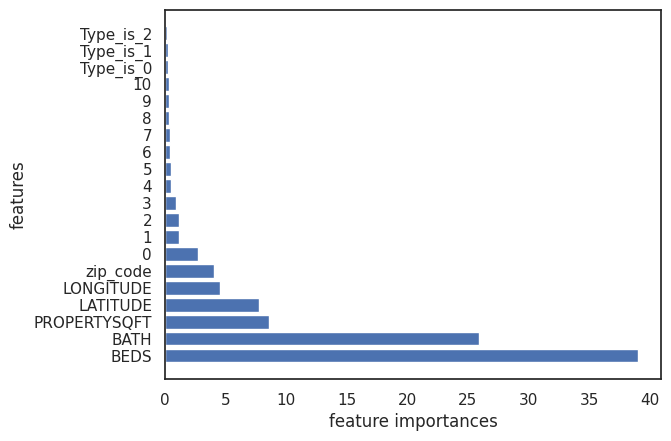

In [130]:
%matplotlib inline
plot_features(X_train.columns[0:20],importances)